# Project Report:  Machine Learning Model for Auto Insurence Industry

#### Nishant Pawar

## Overview:
The auto insurance industry is going through a change in the way it used to work earlier. As the core motive behind the insurence product remains same, it becomes difficult to distinguish the product from other competitors. Since auto insurance company consists of homogenous good thereby making it difficult to differentiate product A from product B, also companies are fighting a price war (for insurance price). On top of that, the distribution channel is shifting more from traditional insurance brokers to online purchases, which means that the ability for companies to interact through human touchpoints is limited, and customers should be quoted at a reasonable price. A good price quote is one that makes the customer purchase the policy and helps the company to increase the profits.Also, the insurance premium is calculated based on more than 50+ parameters, which means that traditional business analytics-based algorithms are now limited in their ability to differentiate among customers based on subtle parameters.

## Challenges:
1. Conquering Market Share: Capture market share by lowering the prices of the premium for the customers, who are least likely to claim.
2. Risk Management: Charge the right premium from the customer, who is likely to claim insurance in the coming year
3. Smooth Processing: Reduce the complexity of pricing models. Most of the transactions are happening online with larger customer attributes (thanks to the internet and social media). Harness the power of huge data to build complex ML models
4. Increased Profits: As per industry estimate 1% reduction in the claim can boost profit by 10%. So, through the ML model, we can identify and deny the insurance to the driver who will make a claim. Thus, ensuring reduced claim outgo and increased profit.

## What does this project address?
The aim of the project is to build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year. Thus by addressing, Risk of a vehicle; If the risk is more, then Insurence company can charge higher premium with limited coverage and liabilities. Identify proper pricing strategy on various flavours of the product, thus increase the market share and inturn increase the Revenue and Profits.

## How do we accomplish this project?
Let's download the dataset, and gather the basic and initial inferences from the data through exploratory data analysis. We then will transform the data as required, based on the statistical analysis. We then try to reduce the features and try to extract most and best out of the least. We will iterate through various algorithms, techniques and finalize a model which best performance in all the aspects. Along the way let's answers some specific questions as well..

## Results/Findings and Summary of the project: 
1. Univariate Analysis shows it is a sparse dataset and has almost all variety of data from Binary to Categorical
2. Target Class is imbalenced with just 4% of Class 1 Labels
3. Bivariate Analysis shows, most of the data is spread and imbalenced within and with target class
3. At a glance, it looks like, detecting anamalies with combination of features in relation with target
4. Hardly 1% of the total binary data is associated with target class of 1. Rest all Data is associated with target class 0
5. Less than 10% (4 features) of the data has correlation greator than 0.5, rest have a very weak correlation almost 0.
6. Less than 50% of the categories in each categorical variable hold more than 80% of the total information
7. Since target is imbalenced, we need to balence the data before we build a model
8. Results are same for Under and Over Sampled Dataset, hence undersampled data is good enough for model building
9. Out of all the features, Cat and Calc variables show high degree of impact on target
10. Only Cat and Calc features on processing the data give best F1 and other metrix
        
        Model  Var  Train   Test  Pre0  Pre1  Rec0  Rec1   F1    AUC
        RandFo C&C  100.0  100.0  1.0   1.0   1.0   1.0    1.0   1.0      PlayAround.ipynb Section 4.h

10. Random Forest model Stands Out in all the category of features/Combinations.
    
    Please Refer Sec in the below table and refer the same in PlayAround.ipynb for details on execution & results
    
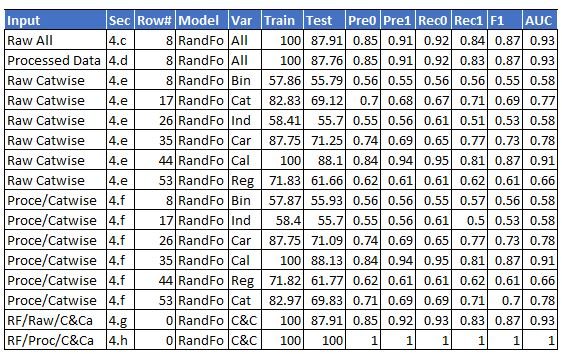

10. In MLP, it is observed that, increasing the hidden layer size beyond 3 layers does not improve scores
11. It is also observed that, size of the hiiden layer when kept from 1 to 3 gives highest accuracy
12. It is also observed that epochs greater than 23 does not improve scores, means epochs upto 23 are sufficient
13. We get the Best metrix for below architectures. 
          
          Based on F1 Score:
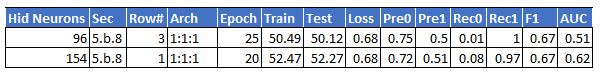
          Based on AUC Score:
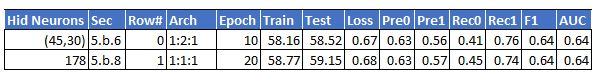
     
    This Implies, Model will have its peak accuracy between 1 to 3 hidden layers with neurons between 96 to 30 in each layer
    
    PS: Winner of the Porto Seguro Kaggle competition has got 0.64 AUC with LGBM and AutoEncoder model. 

## Further work on the Project
This project can be detailed further to experiment with different combinations of hidden layers and neuron sizes as suggested by the initial study and findings to improve accuracy. Also we can play around further with tuning parameters to adjust the accuracy.

## Project Flow in Detail:

### Import all the required libraries

In [110]:
#Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score,confusion_matrix, classification_report
plt.rcParams['font.size']=10
plt.rcParams['lines.markersize']=7
plt.rcParams['axes.labelsize']=16
plt.rcParams['figure.figsize'] = (15,15)

## First Impression of the Data

### Read the Data

In [101]:
#Read the Dataset and print the sample data
df = pd.read_csv("train.csv")
print("Shape of the Dataset: \n",df.shape)
df.head()      

Shape of the Dataset: 
 (595212, 59)


id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

### Drop the unwanted columns and Seperate the target
Analyze the data Statistically

In [102]:
#Drop the unwanted columns and Seperate the target
#Analyze the data Statistically
df = df.drop(["id"], axis=1)
y = df["target"]
df.describe()

target      ps_ind_01  ps_ind_02_cat      ps_ind_03  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.036448       1.900378       1.358943       4.423318   
std         0.187401       1.983789       0.664594       2.699902   
min         0.000000       0.000000      -1.000000       0.000000   
25%         0.000000       0.000000       1.000000       2.000000   
50%         0.000000       1.000000       1.000000       4.000000   
75%         0.000000       3.000000       2.000000       6.000000   
max         1.000000       7.000000       4.000000      11.000000   

       ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.416794       0.405188       0.393742       0.257033   
std         0.493311       1.350642       0.488579       0.436998   
min        -1.000000      -1.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         1.000000       6.000000       1.000000       1.000000   

       ps_ind_08_bin  ps_ind_09_bin  ...     ps_calc_11     ps_calc_12  \
count  595212.000000  595212.000000  ...  595212.000000  595212.000000   
mean        0.163921       0.185304  ...       5.441382       1.441918   
std         0.370205       0.388544  ...       2.332871       1.202963   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       4.000000       1.000000   
50%         0.000000       0.000000  ...       5.000000       1.000000   
75%         0.000000       0.000000  ...       7.000000       2.000000   
max         1.000000       1.000000  ...      19.000000      10.000000   

          ps_calc_13     ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
count  595212.000000  595212.000000   595212.000000   595212.000000   
mean        2.872288       7.539026        0.122427        0.627840   
std         1.694887       2.746652        0.327779        0.483381   
min         0.000000       0.000000        0.000000        0.000000   
25%         2.000000       6.000000        0.000000        0.000000   
50%         3.000000       7.000000        0.000000        1.000000   
75%         4.000000       9.000000        0.000000        1.000000   
max        13.000000      23.000000        1.000000        1.000000   

       ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
count   595212.000000   595212.000000   595212.000000   595212.000000  
mean         0.554182        0.287182        0.349024        0.153318  
std          0.497056        0.452447        0.476662        0.360295  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          1.000000        0.000000        0.000000        0.000000  
75%          1.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 58 columns]

### Classify the features according to their categories

In [45]:
#Function to classify and retreive the features 
def get_meta(df):
    data = []
    for col in df.columns:
        # Defining the role
        if col == 'target':
            role = 'target'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif df[col].dtype == np.float64:
            level = 'interval'
        elif df[col].dtype == np.int64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = df[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

meta_data = get_meta(df)
display(meta_data)

role     level  keep    dtype
varname                                        
target          target    binary  True    int64
ps_ind_01        input   ordinal  True    int64
ps_ind_02_cat    input   nominal  True    int64
ps_ind_03        input   ordinal  True    int64
ps_ind_04_cat    input   nominal  True    int64
ps_ind_05_cat    input   nominal  True    int64
ps_ind_06_bin    input    binary  True    int64
ps_ind_07_bin    input    binary  True    int64
ps_ind_08_bin    input    binary  True    int64
ps_ind_09_bin    input    binary  True    int64
ps_ind_10_bin    input    binary  True    int64
ps_ind_11_bin    input    binary  True    int64
ps_ind_12_bin    input    binary  True    int64
ps_ind_13_bin    input    binary  True    int64
ps_ind_14        input   ordinal  True    int64
ps_ind_15        input   ordinal  True    int64
ps_ind_16_bin    input    binary  True    int64
ps_ind_17_bin    input    binary  True    int64
ps_ind_18_bin    input    binary  True    int64
ps_reg_01        input  interval  True  float64
ps_reg_02        input  interval  True  float64
ps_reg_03        input  interval  True  float64
ps_car_01_cat    input   nominal  True    int64
ps_car_02_cat    input   nominal  True    int64
ps_car_03_cat    input   nominal  True    int64
ps_car_04_cat    input   nominal  True    int64
ps_car_05_cat    input   nominal  True    int64
ps_car_06_cat    input   nominal  True    int64
ps_car_07_cat    input   nominal  True    int64
ps_car_08_cat    input   nominal  True    int64
ps_car_09_cat    input   nominal  True    int64
ps_car_10_cat    input   nominal  True    int64
ps_car_11_cat    input   nominal  True    int64
ps_car_11        input   ordinal  True    int64
ps_car_12        input  interval  True  float64
ps_car_13        input  interval  True  float64
ps_car_14        input  interval  True  float64
ps_car_15        input  interval  True  float64
ps_calc_01       input  interval  True  float64
ps_calc_02       input  interval  True  float64
ps_calc_03       input  interval  True  float64
ps_calc_04       input   ordinal  True    int64
ps_calc_05       input   ordinal  True    int64
ps_calc_06       input   ordinal  True    int64
ps_calc_07       input   ordinal  True    int64
ps_calc_08       input   ordinal  True    int64
ps_calc_09       input   ordinal  True    int64
ps_calc_10       input   ordinal  True    int64
ps_calc_11       input   ordinal  True    int64
ps_calc_12       input   ordinal  True    int64
ps_calc_13       input   ordinal  True    int64
ps_calc_14       input   ordinal  True    int64
ps_calc_15_bin   input    binary  True    int64
ps_calc_16_bin   input    binary  True    int64
ps_calc_17_bin   input    binary  True    int64
ps_calc_18_bin   input    binary  True    int64
ps_calc_19_bin   input    binary  True    int64
ps_calc_20_bin   input    binary  True    int64

### Group the features

In [51]:
Binary_var = meta_data[meta_data.level=="binary"].index
Ordinal_var = meta_data[meta_data.level=="ordinal"].index
Nominal_var = meta_data[meta_data.level=="nominal"].index
Interval_var = meta_data[meta_data.level=="interval"].index
meta_data.level.value_counts()

binary      18
ordinal     16
nominal     14
interval    10
Name: level, dtype: int64

### Let us check how many classes we have in each of the feature/target and list the distinct classes

In [54]:
for a in df.columns:
    print(str(a)+" ("+str(len(df[a].unique()))+") : ", df[a].unique())

Let us check how many classes we have in each of the feature/target and list the distinct classes
target (2) :  [0 1]
ps_ind_01 (8) :  [2 1 5 0 4 3 6 7]
ps_ind_02_cat (5) :  [ 2  1  4  3 -1]
ps_ind_03 (12) :  [ 5  7  9  2  0  4  3  1 11  6  8 10]
ps_ind_04_cat (3) :  [ 1  0 -1]
ps_ind_05_cat (8) :  [ 0  1  4  3  6  5 -1  2]
ps_ind_06_bin (2) :  [0 1]
ps_ind_07_bin (2) :  [1 0]
ps_ind_08_bin (2) :  [0 1]
ps_ind_09_bin (2) :  [0 1]
ps_ind_10_bin (2) :  [0 1]
ps_ind_11_bin (2) :  [0 1]
ps_ind_12_bin (2) :  [0 1]
ps_ind_13_bin (2) :  [0 1]
ps_ind_14 (5) :  [0 1 2 3 4]
ps_ind_15 (14) :  [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
ps_ind_16_bin (2) :  [0 1]
ps_ind_17_bin (2) :  [1 0]
ps_ind_18_bin (2) :  [0 1]
ps_reg_01 (10) :  [0.7 0.8 0.  0.9 0.6 0.5 0.4 0.3 0.2 0.1]
ps_reg_02 (19) :  [0.2 0.4 0.  0.6 1.8 0.1 0.7 1.4 0.9 0.3 0.5 0.8 1.  1.3 1.6 1.5 1.2 1.1
 1.7]
ps_reg_03 (5013) :  [ 0.71807033  0.76607767 -1.         ...  1.60078106  1.63075903
  1.74355958]
ps_car_01_cat (13) :  [10 11  

ps_calc_02 (10) :  [0.5 0.1 0.7 0.9 0.6 0.8 0.4 0.  0.3 0.2]
ps_calc_03 (10) :  [0.2 0.3 0.1 0.  0.4 0.5 0.6 0.8 0.9 0.7]
ps_calc_04 (6) :  [3 2 1 4 0 5]
ps_calc_05 (7) :  [1 2 4 3 0 5 6]
ps_calc_06 (11) :  [10  9  7  6  8  5  4  3  2  1  0]
ps_calc_07 (10) :  [1 5 3 2 4 6 0 7 8 9]
ps_calc_08 (11) :  [10  8 11  6  9  7  5 12  4  3  2]
ps_calc_09 (8) :  [1 2 4 3 0 5 6 7]
ps_calc_10 (26) :  [ 5  7  2 12  8 10 13 11  9 18  4 15  6 14 16  3  1 17  0 21 19 20 22 23
 25 24]
ps_calc_11 (20) :  [ 9  3  4  2  7  6  5 10  8  1  0 13 11 12 14 15 16 19 17 18]
ps_calc_12 (11) :  [ 1  2  0  5  3  4  6  7  8  9 10]
ps_calc_13 (14) :  [ 5  1  7  4  0  3  6  2  8 10  9 11 12 13]
ps_calc_14 (24) :  [ 8  9  7  3 10  6  5 11  4 14 13 12 16  2  1 15 17  0 19 20 18 22 21 23]
ps_calc_15_bin (2) :  [0 1]
ps_calc_16_bin (2) :  [1 0]
ps_calc_17_bin (2) :  [1 0]
ps_calc_18_bin (2) :  [0 1]
ps_calc_19_bin (2) :  [0 1]
ps_calc_20_bin (2) :  [1 0]


### Univariate Analysis

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


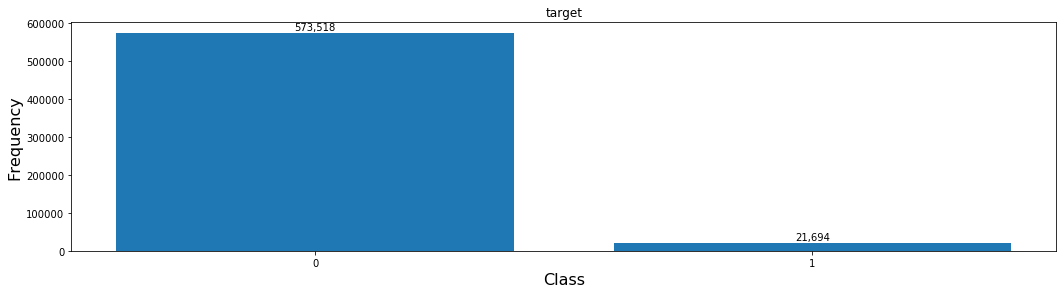

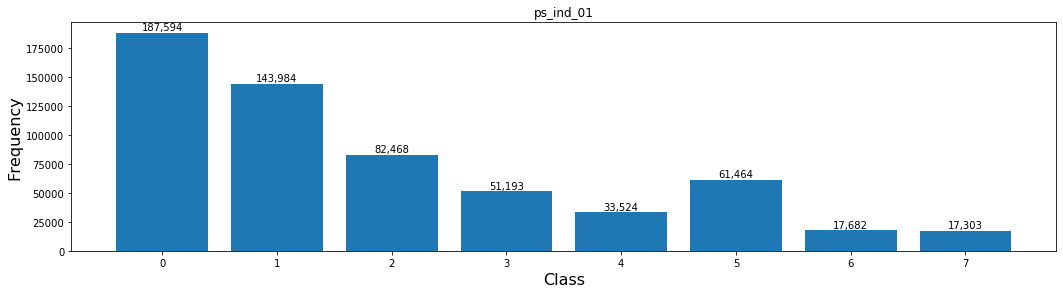

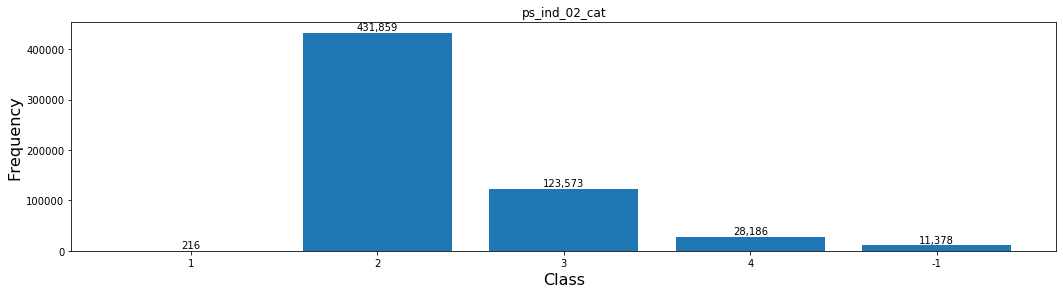

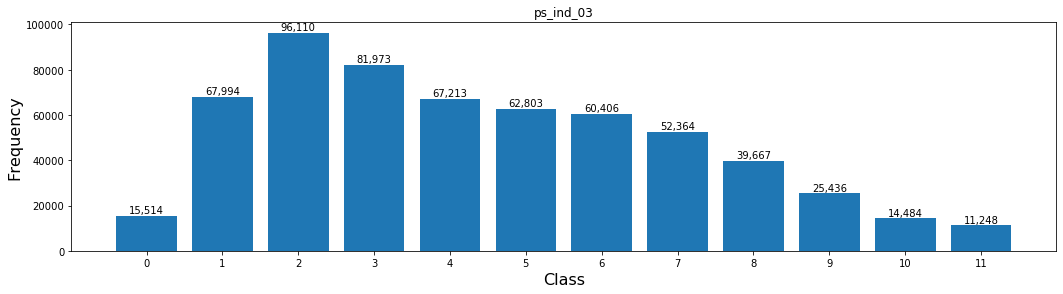

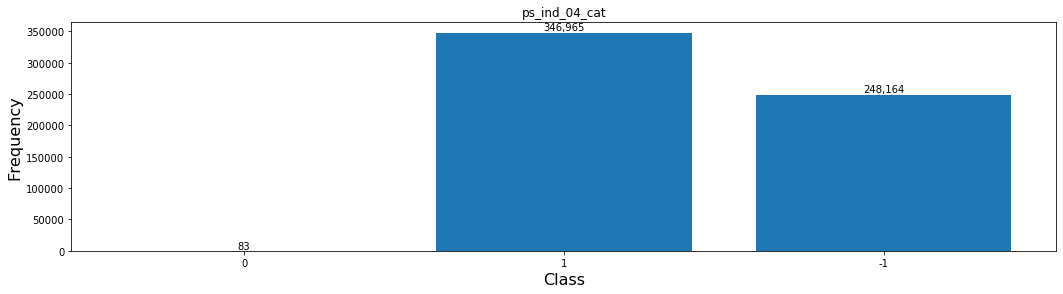

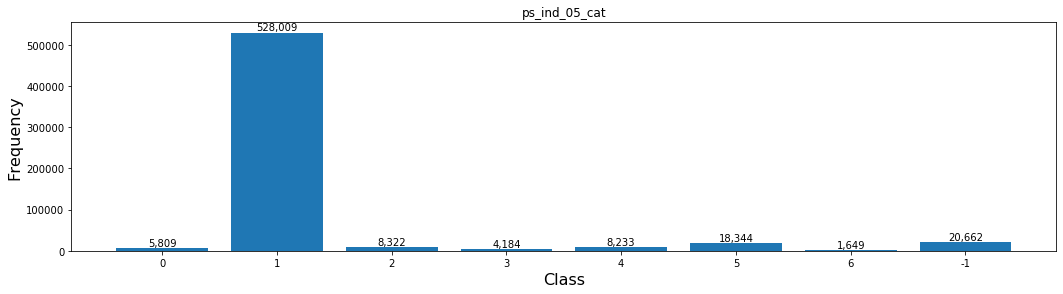

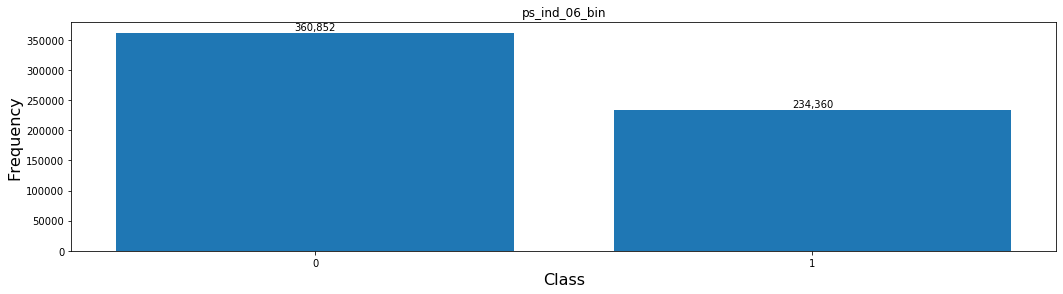

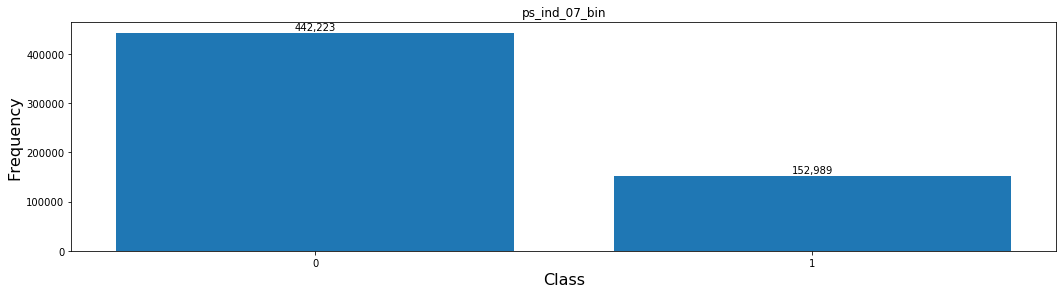

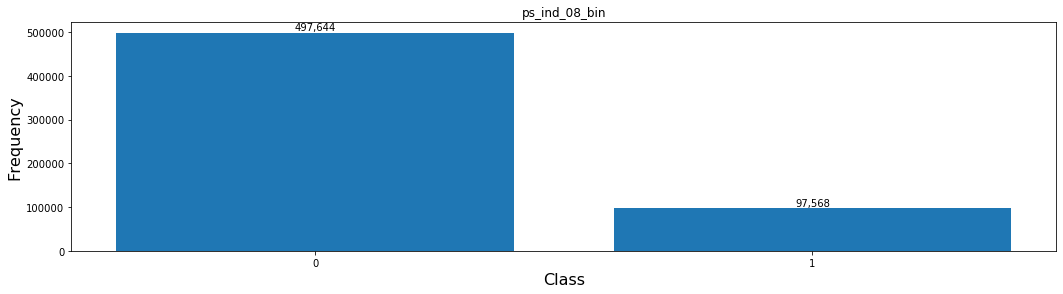

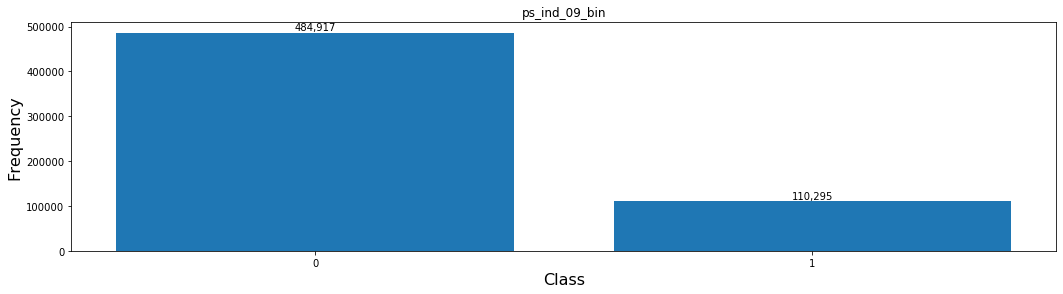

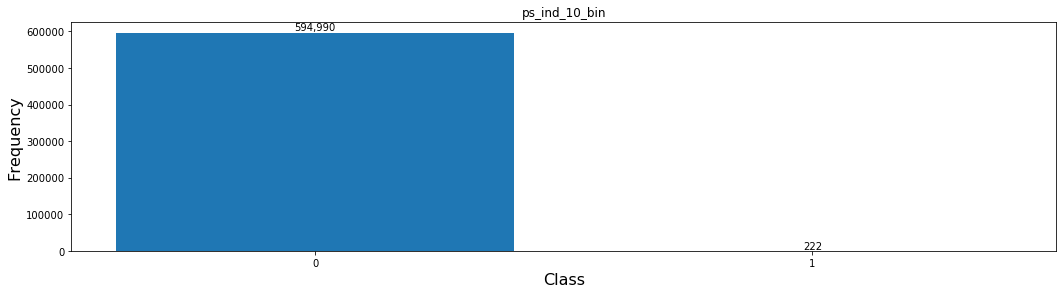

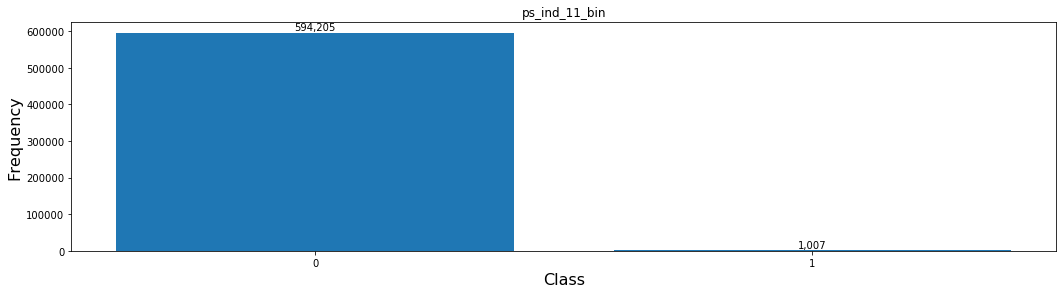

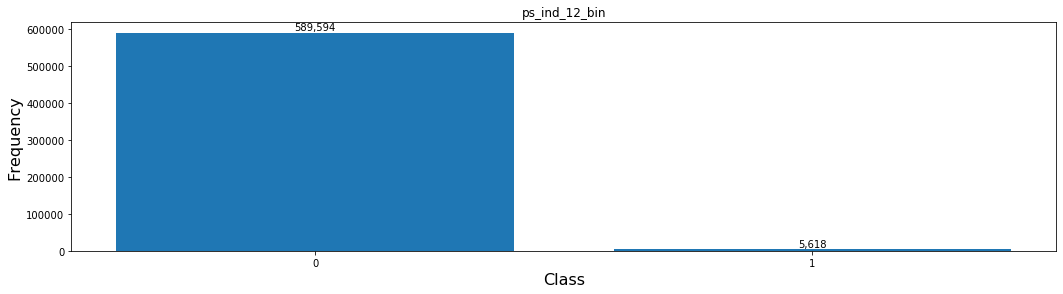

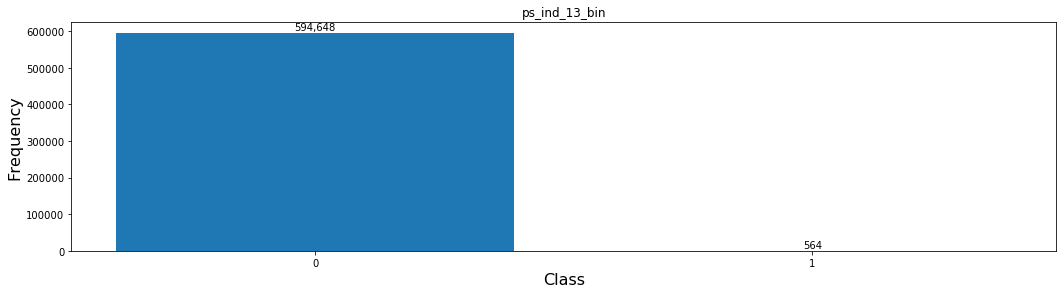

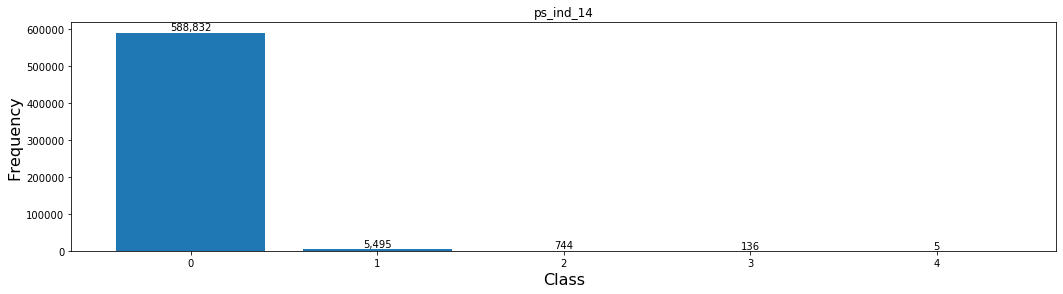

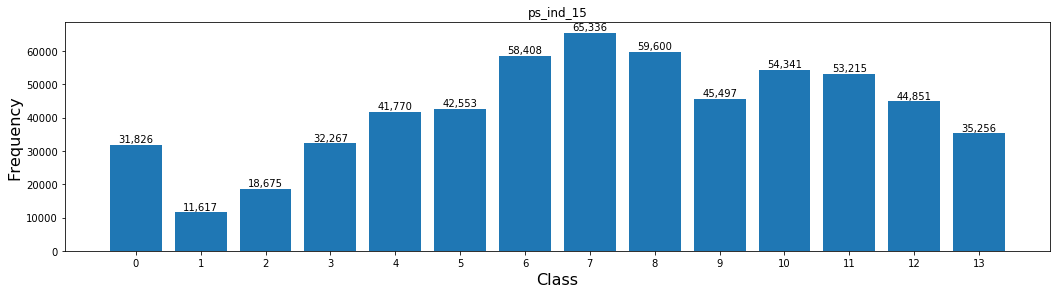

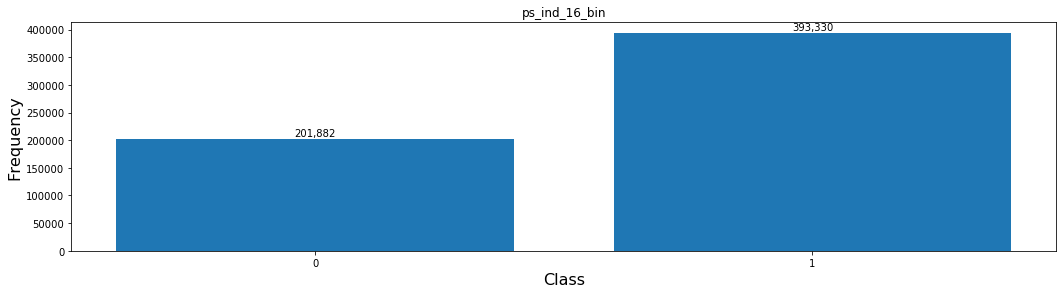

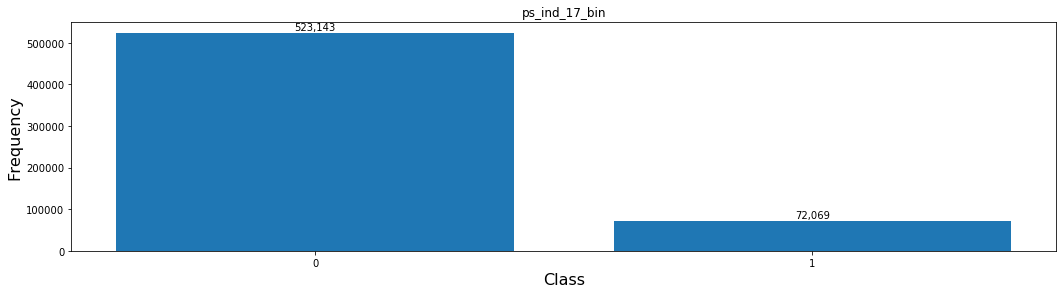

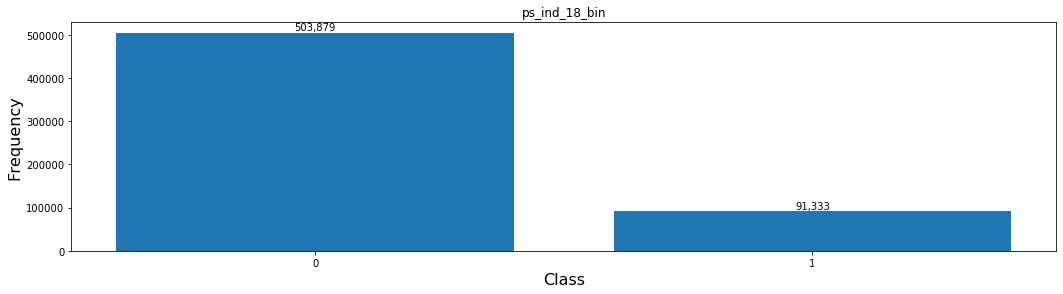

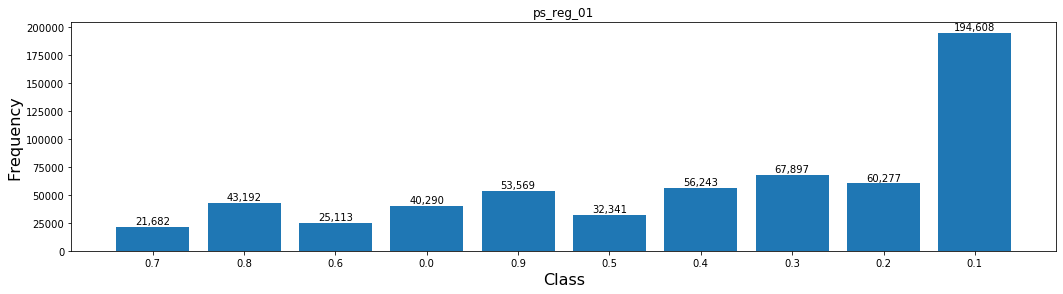

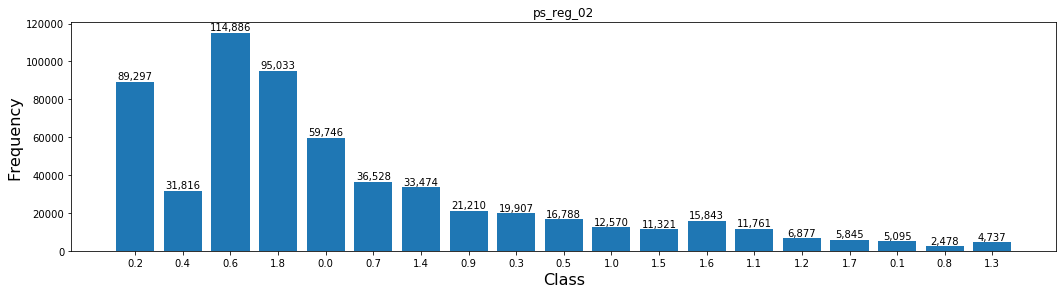

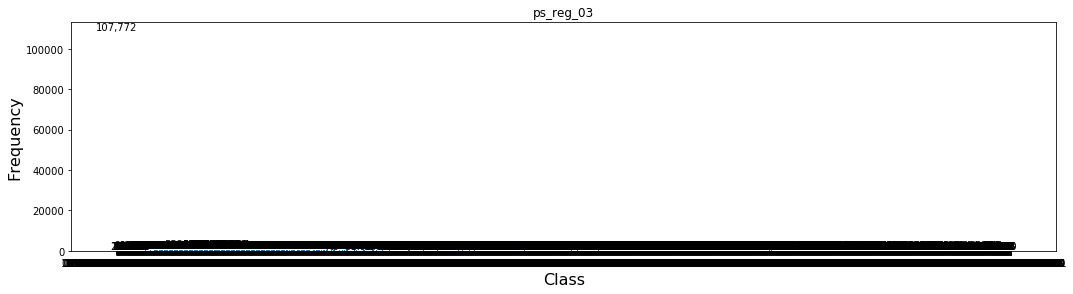

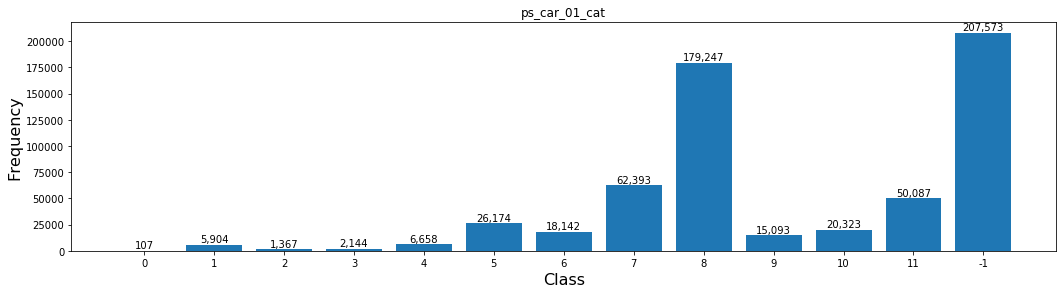

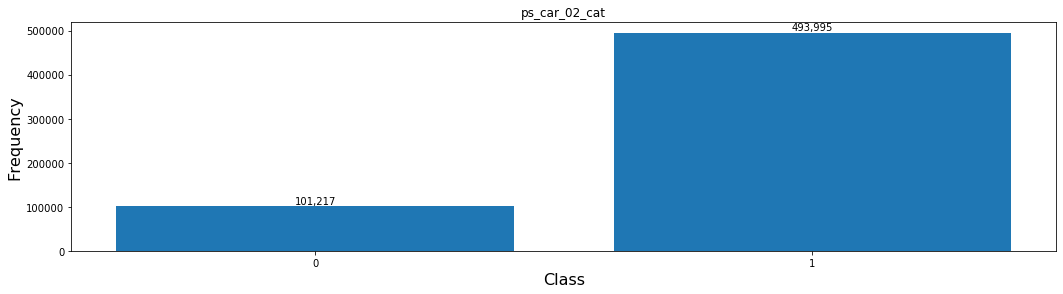

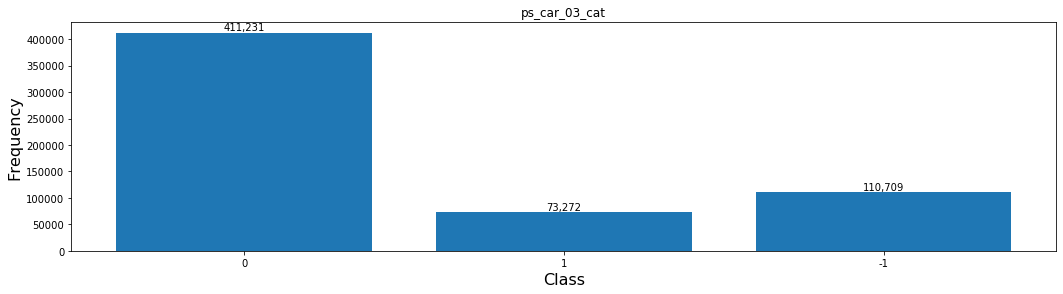

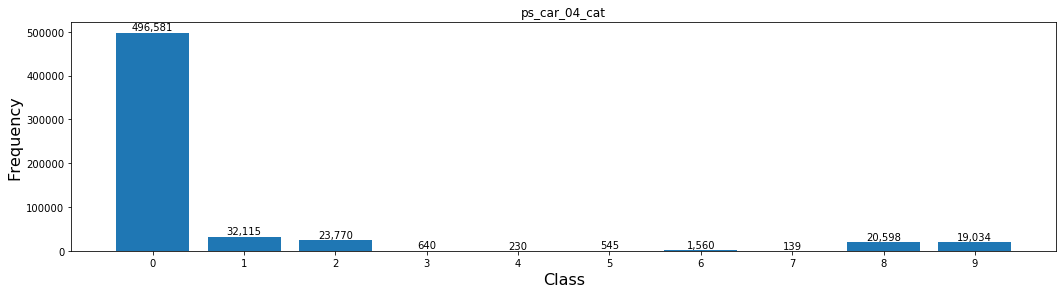

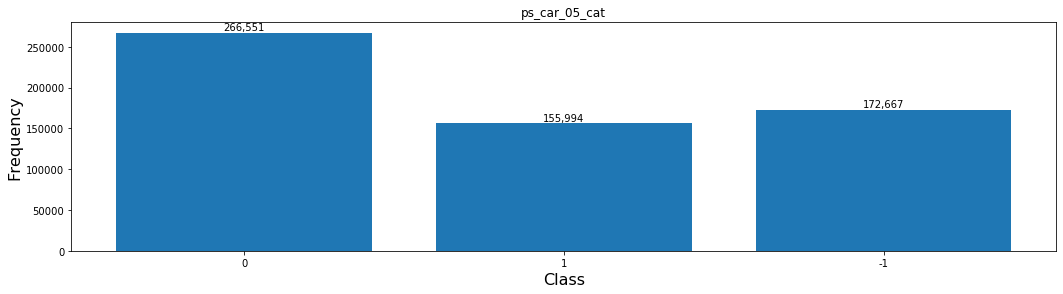

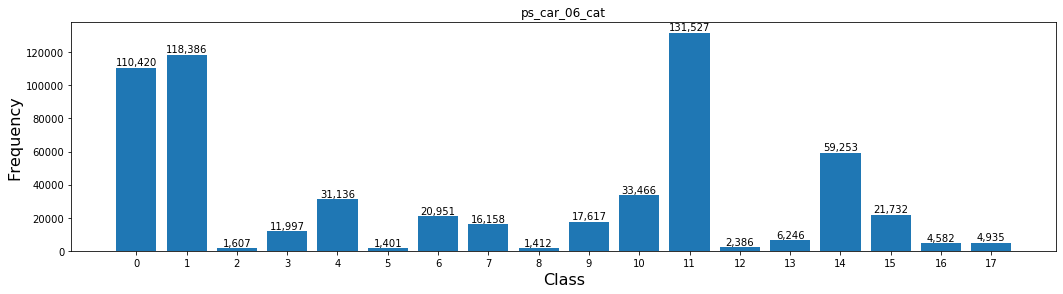

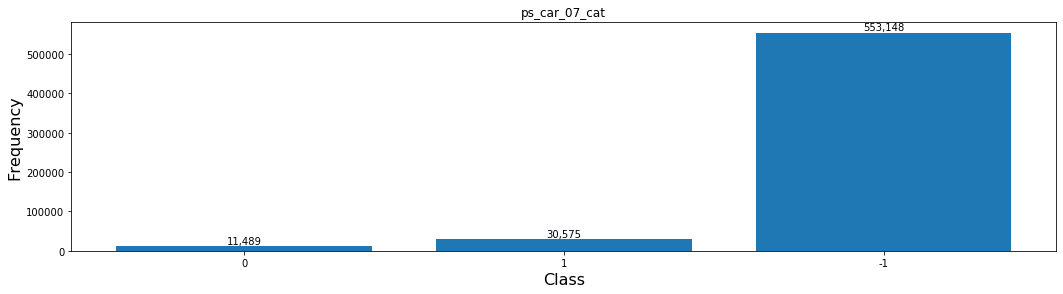

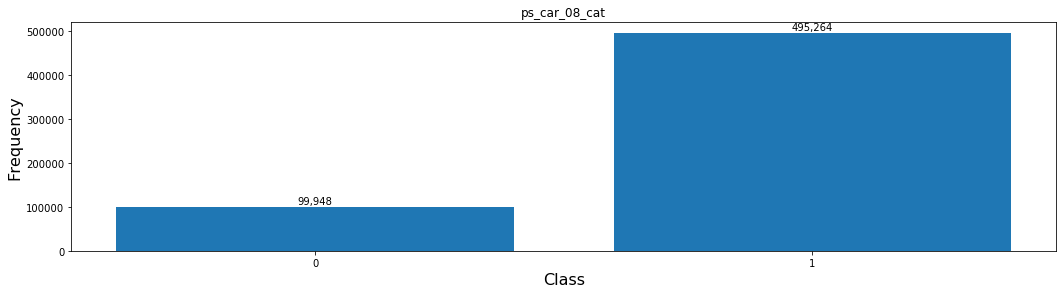

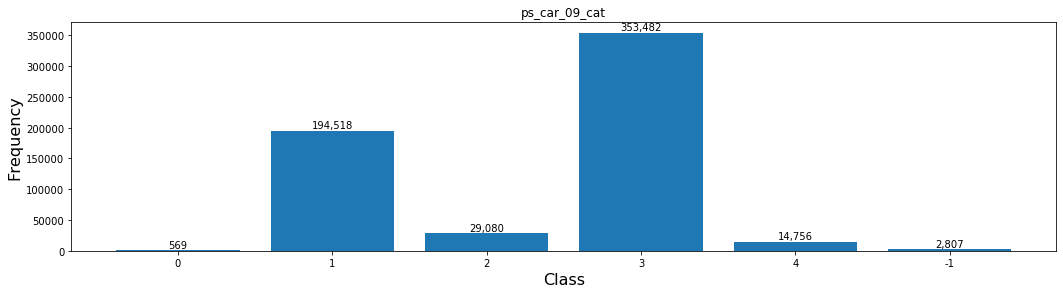

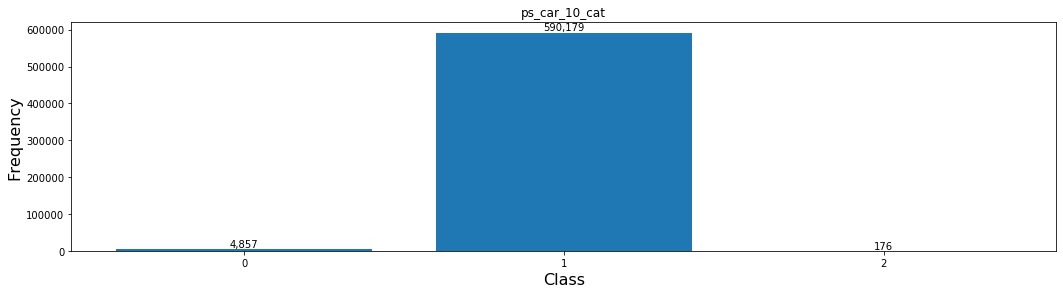

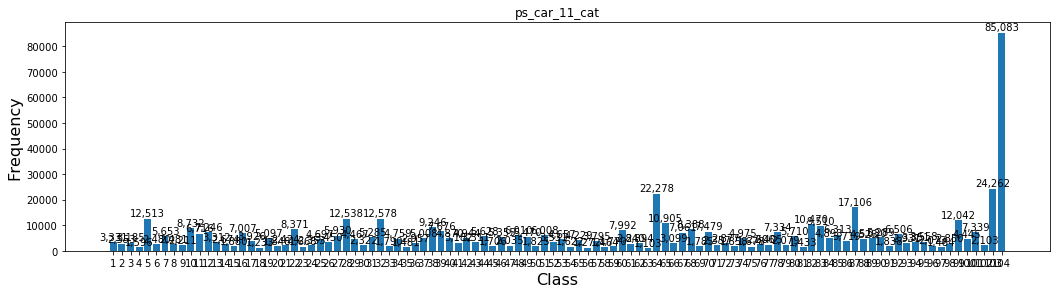

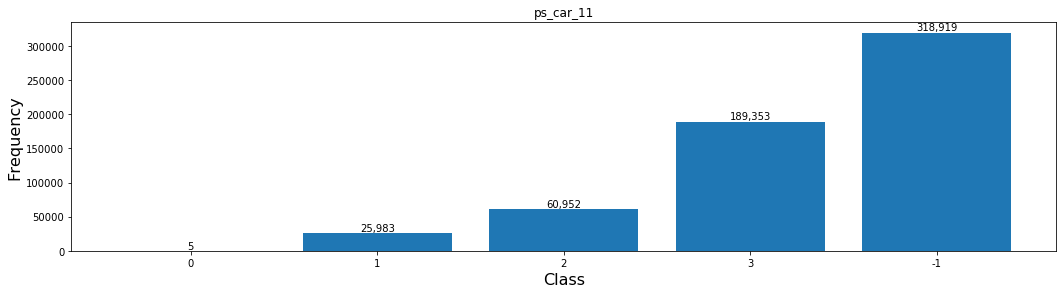

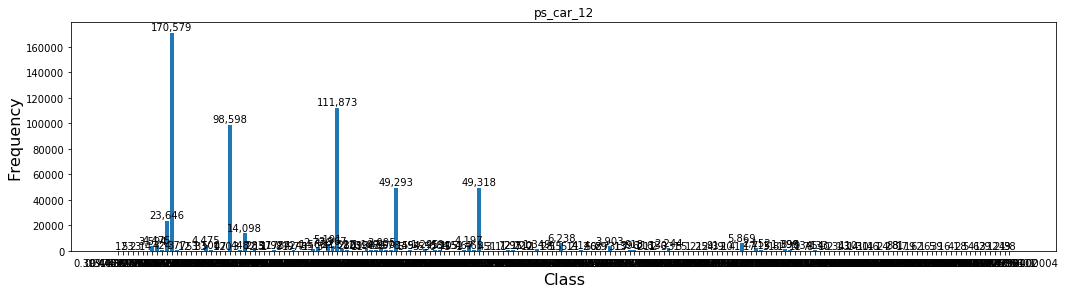

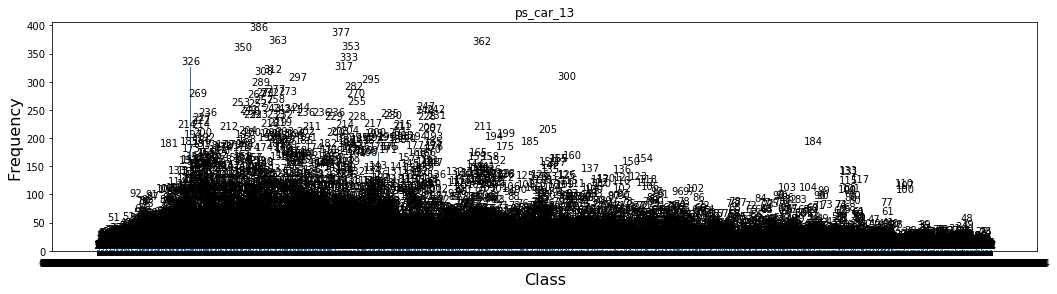

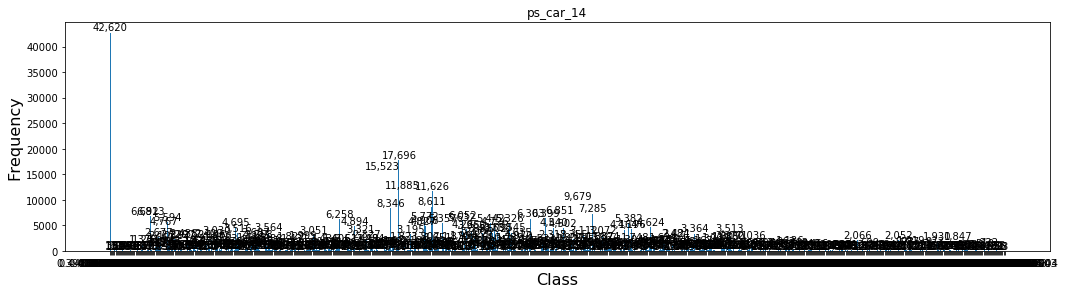

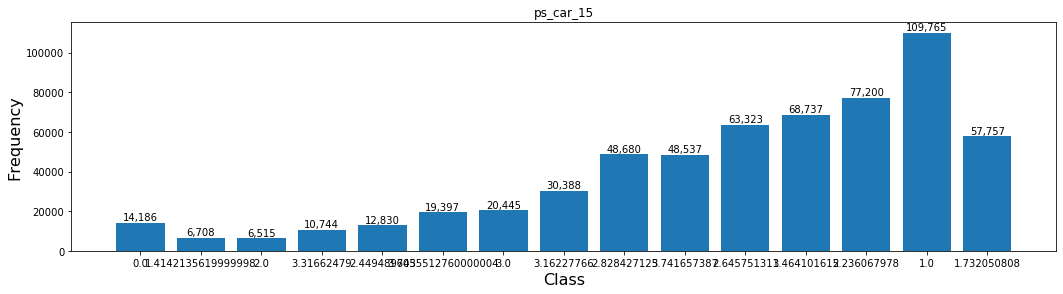

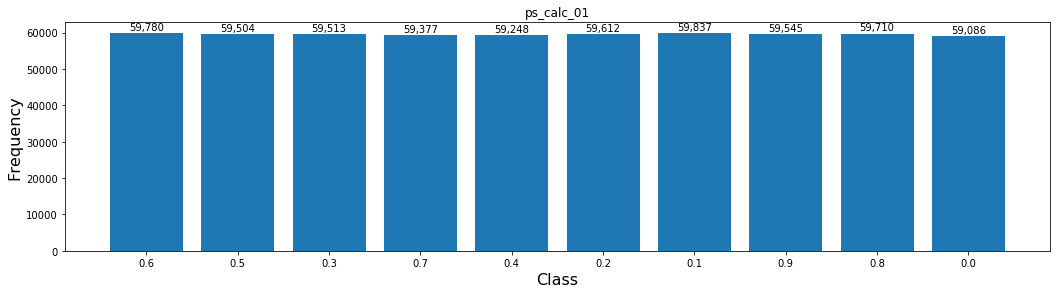

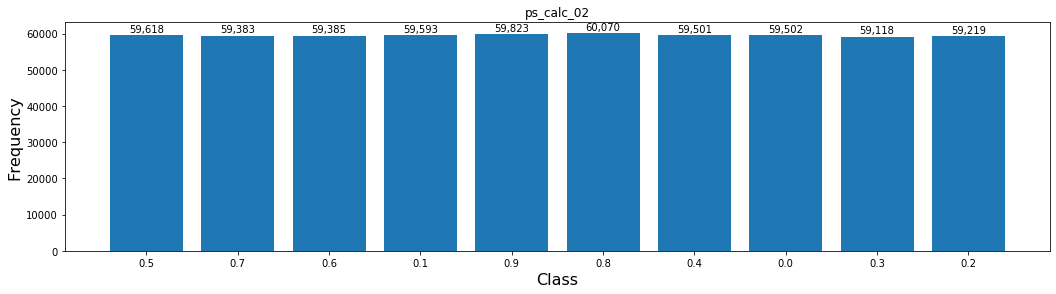

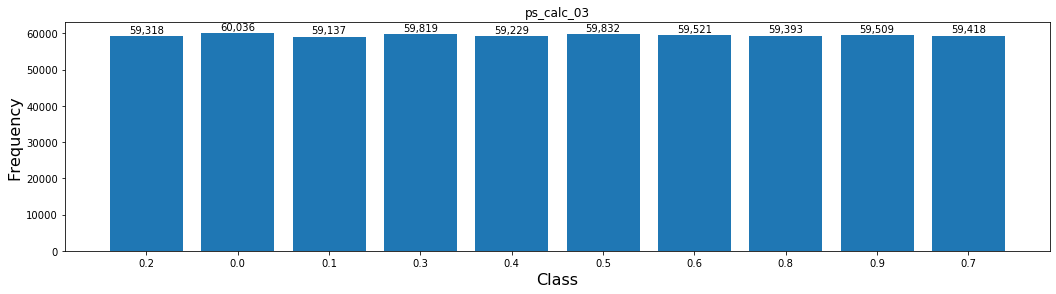

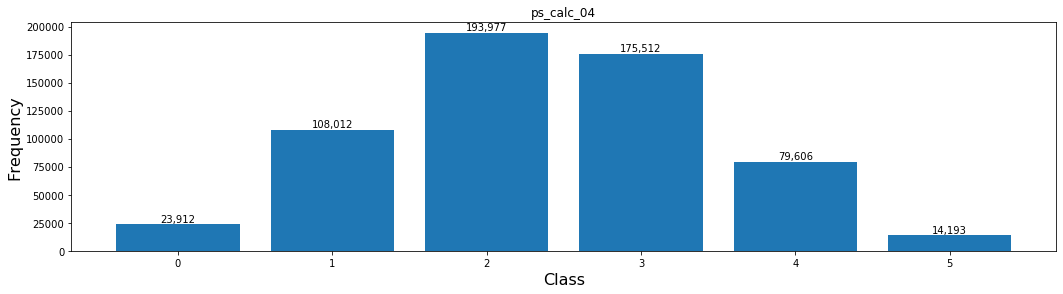

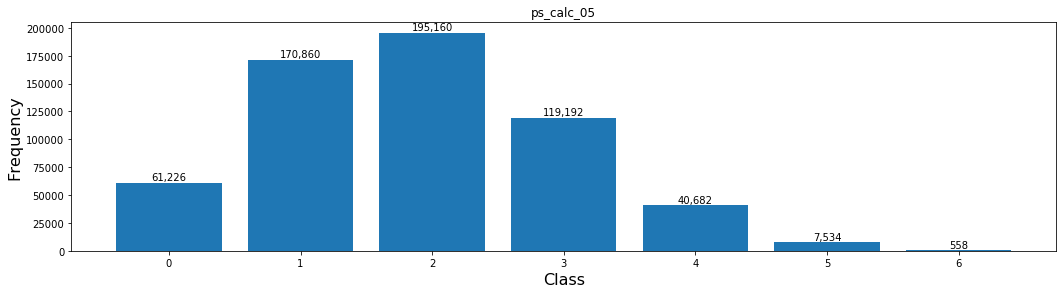

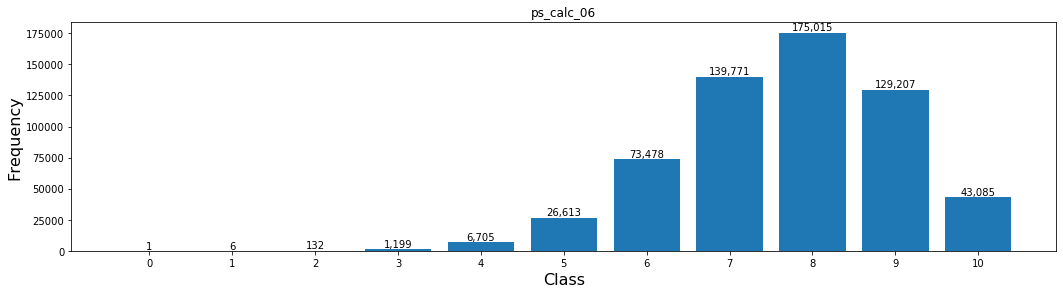

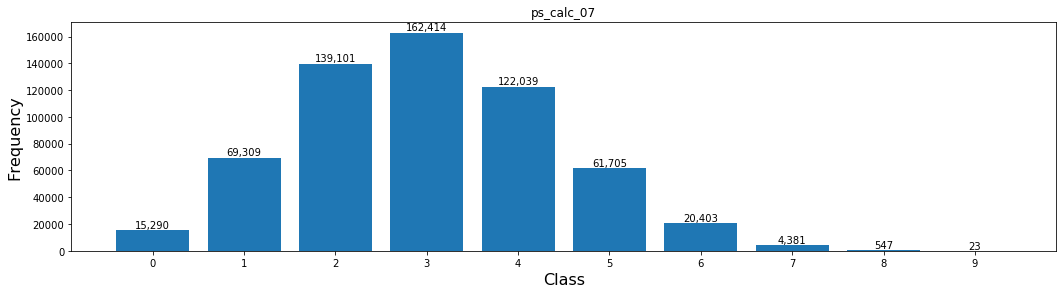

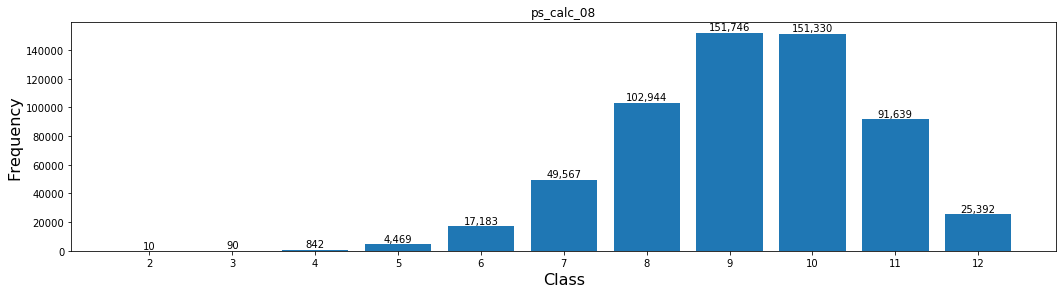

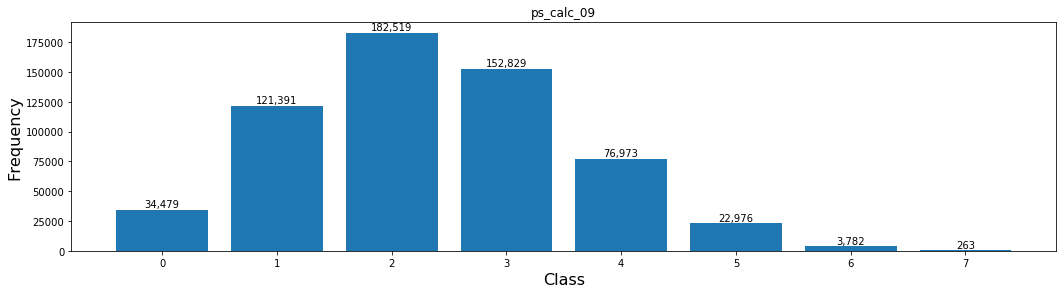

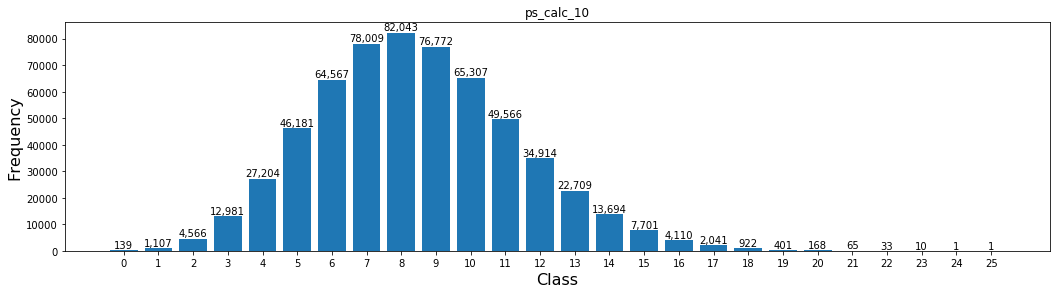

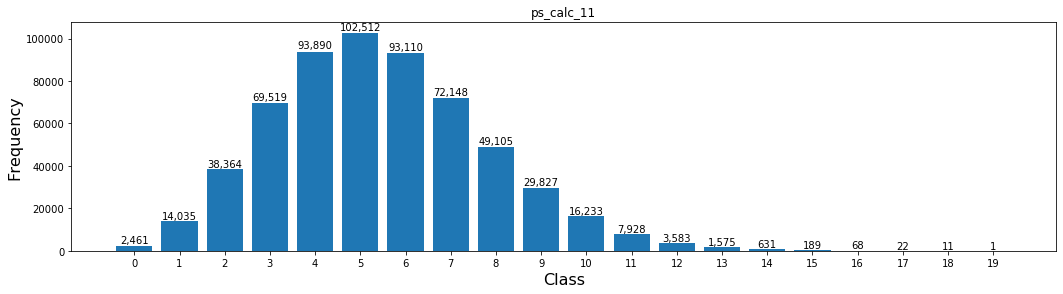

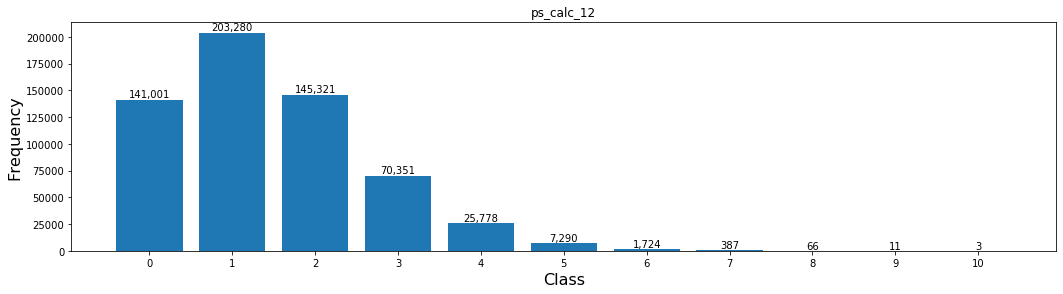

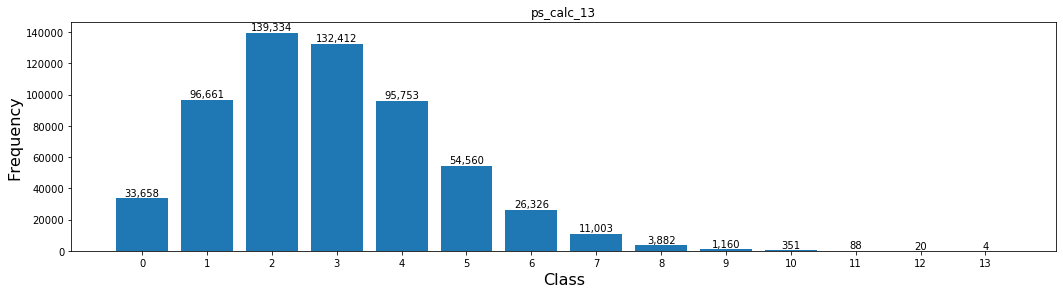

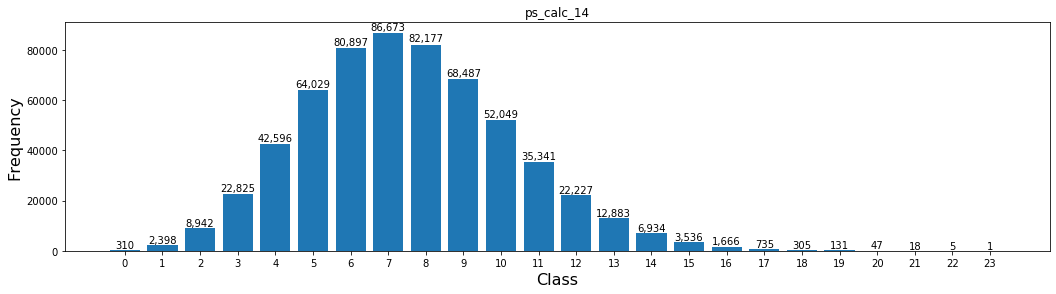

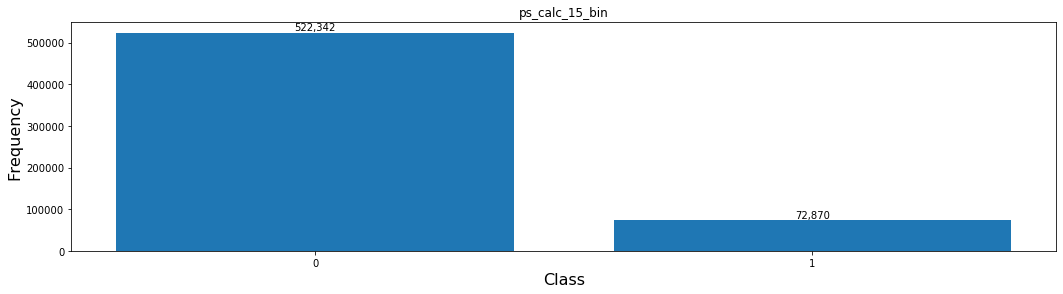

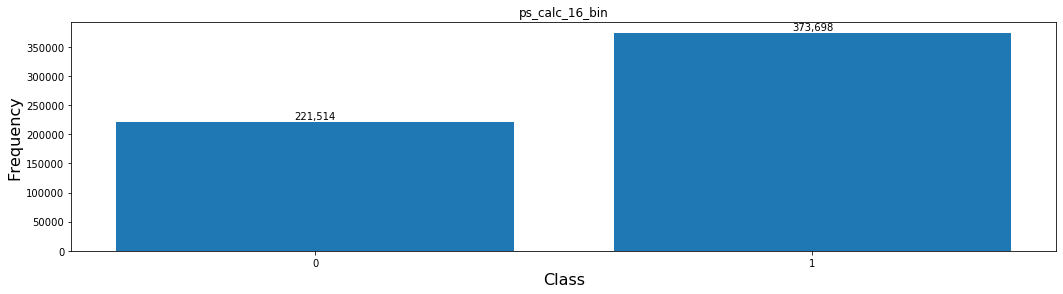

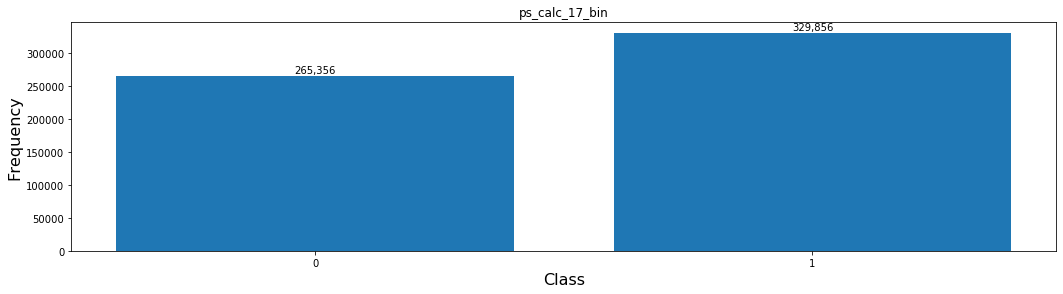

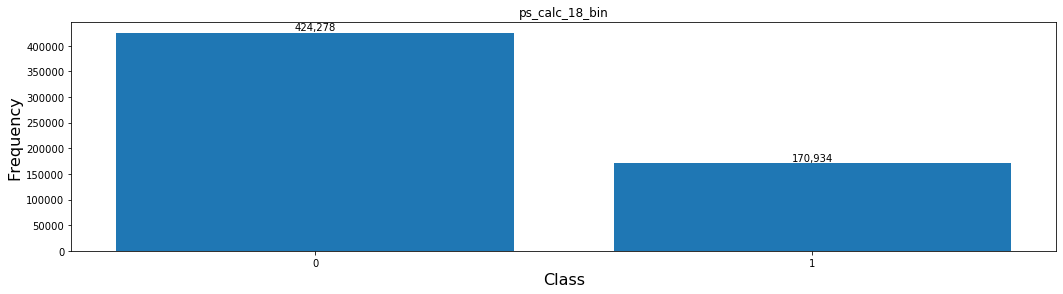

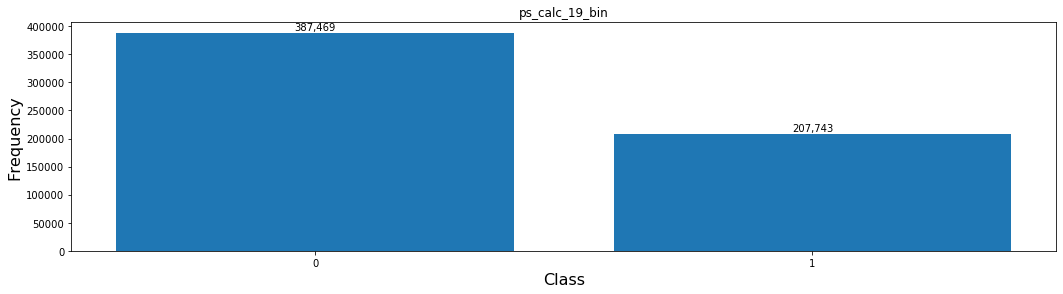

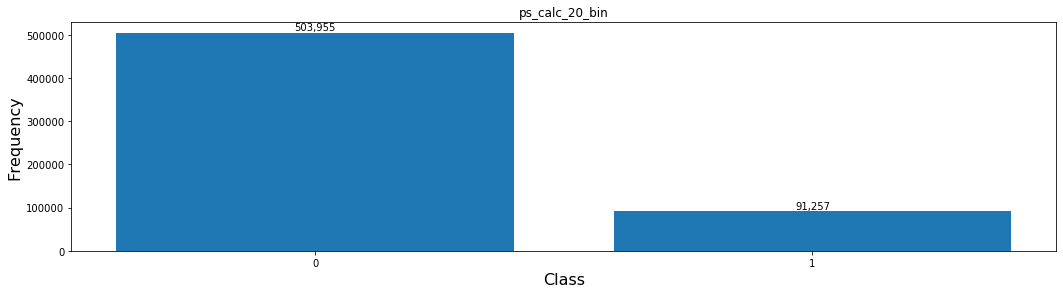

In [172]:
i=1

for a in df.columns:
    plt.rcParams['font.size']=10
    plt.rcParams['lines.markersize']=7
    plt.rcParams['axes.labelsize']=16
    plt.figure(figsize = (60,100))
    df2=pd.DataFrame()
    df1 = df.groupby(a)[a].count()
    df2=pd.DataFrame(df1)
    ax = plt.subplot(20,3,i)
    X_axis = np.array(list(set(df[a]))).astype(str)
    rects1 = ax.bar(X_axis, df2.iloc[:,0])
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(a)
    autolabel(rects1)
    i=i+1
    #print(i)
    #plt.show()
#print(i)
plt.show()

### Bivariate Analysis

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


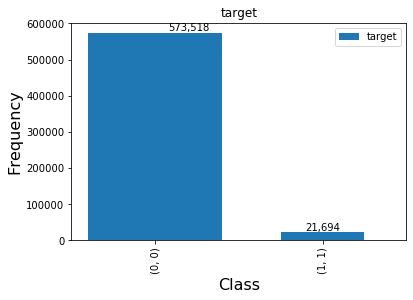

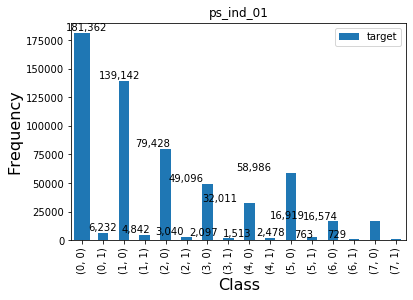

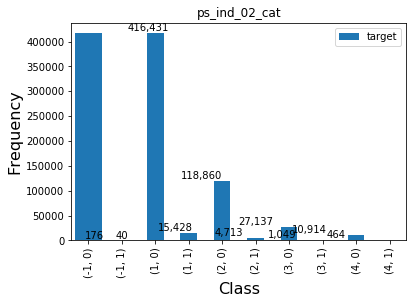

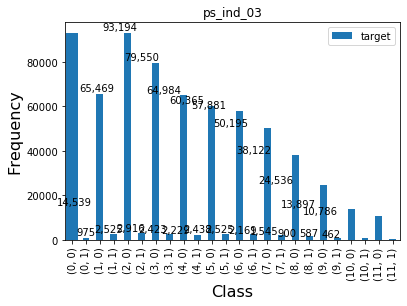

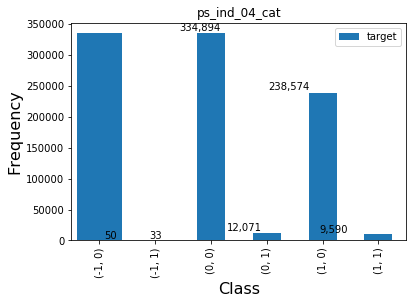

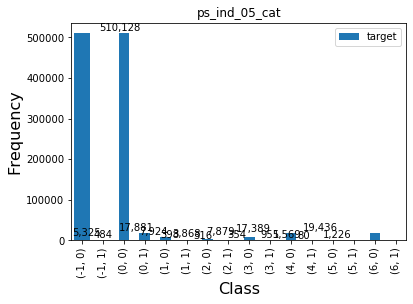

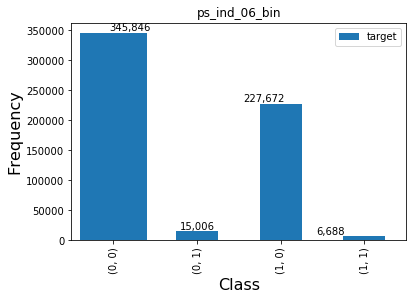

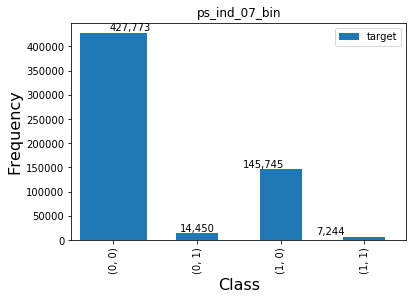

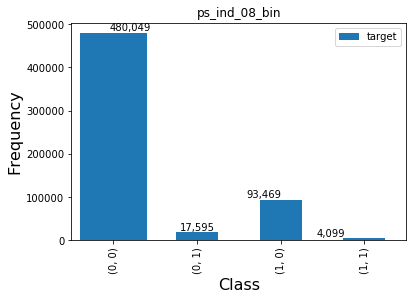

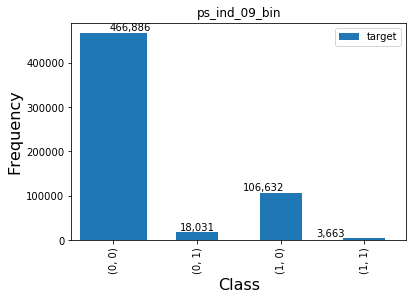

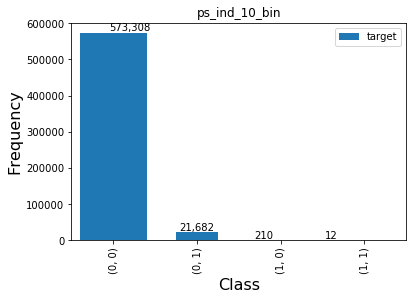

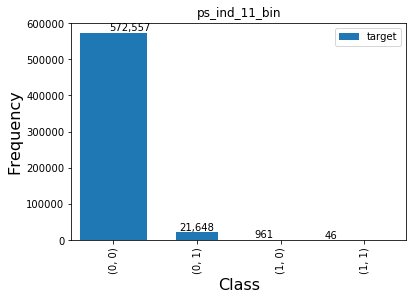

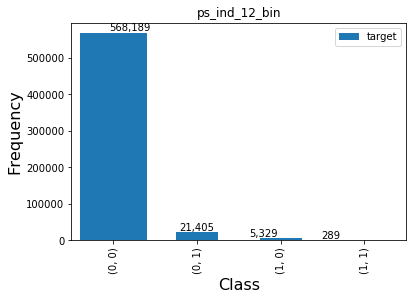

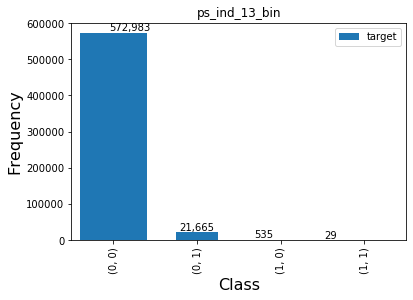

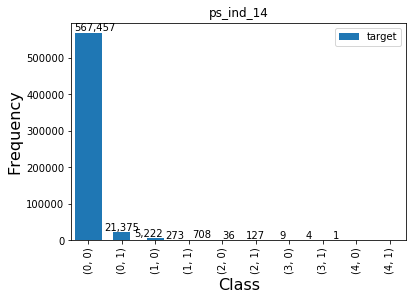

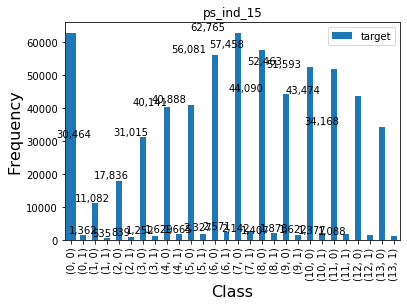

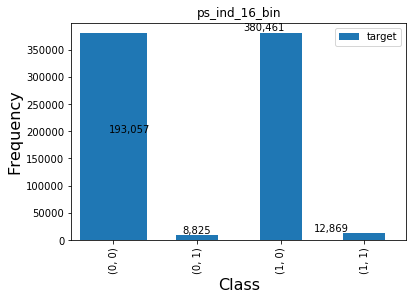

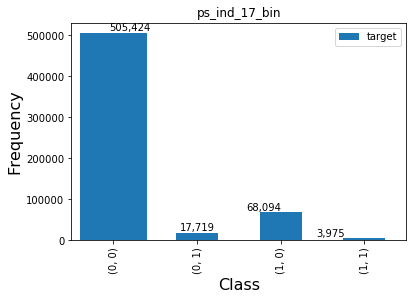

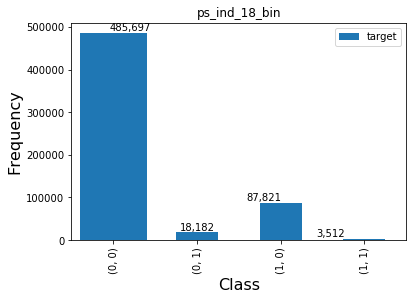

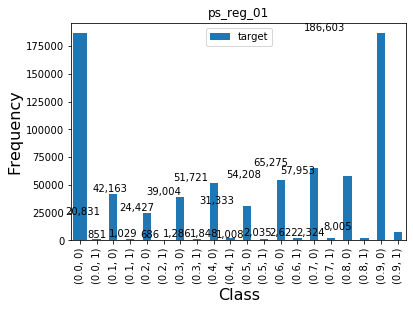

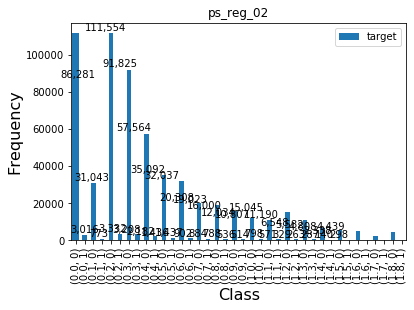

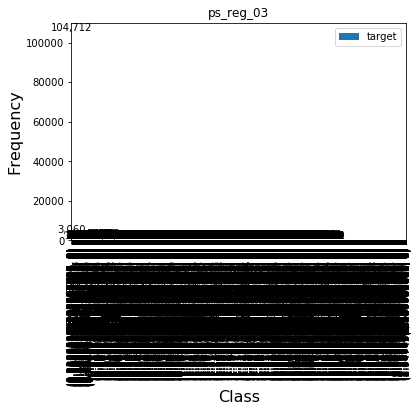

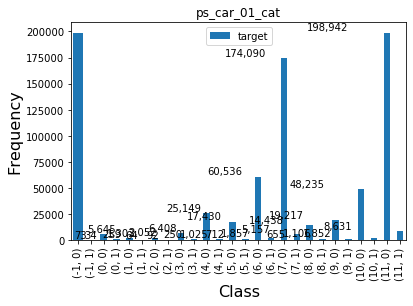

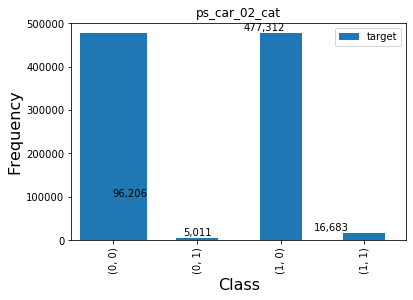

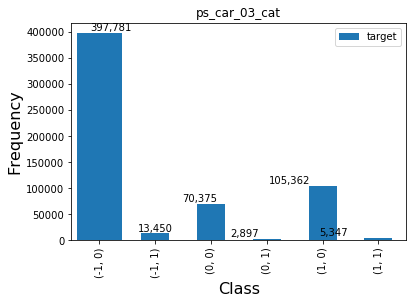

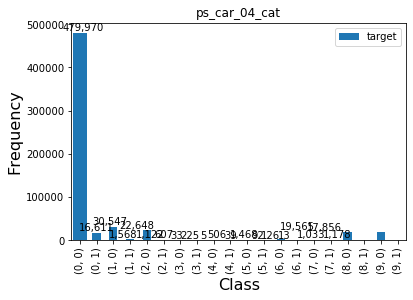

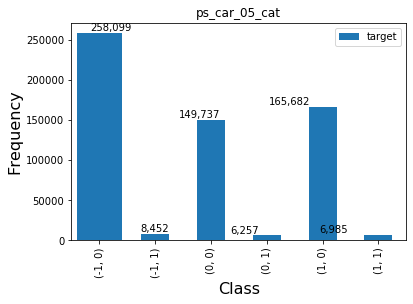

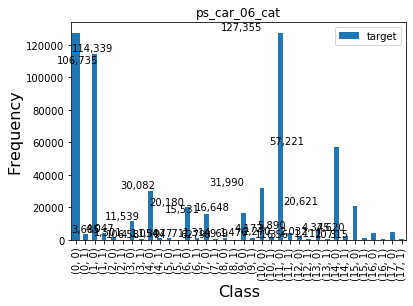

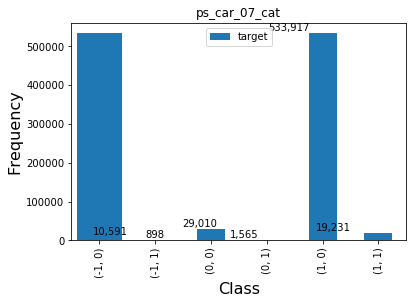

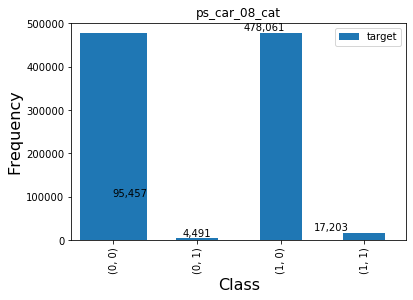

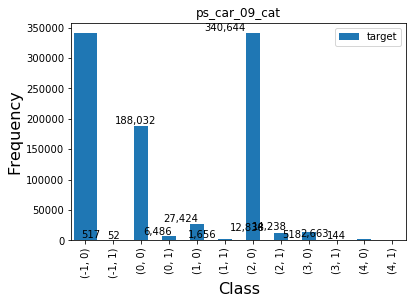

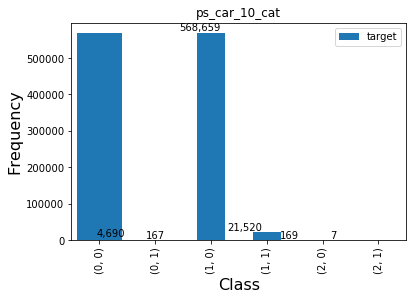

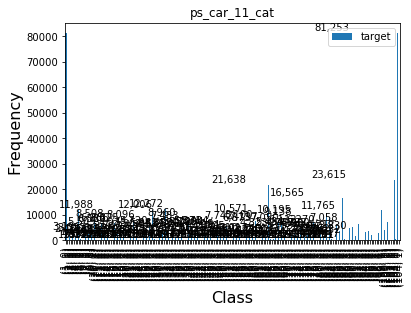

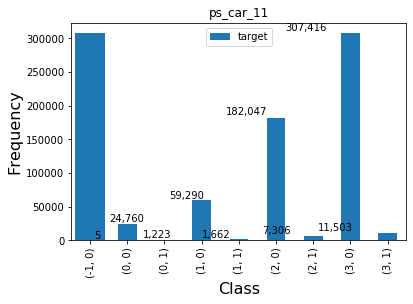

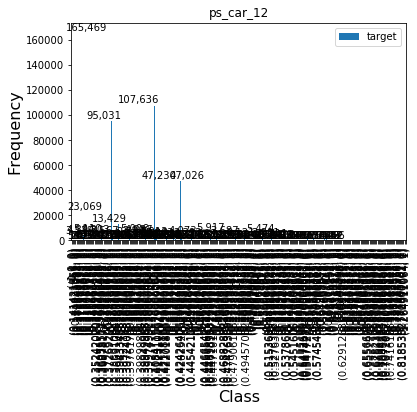

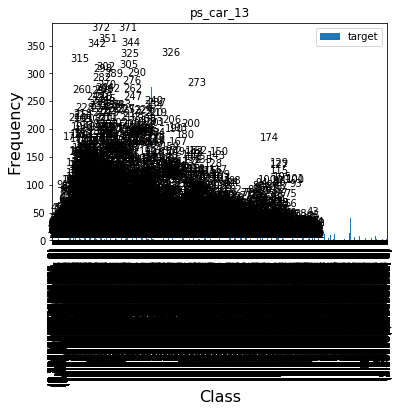

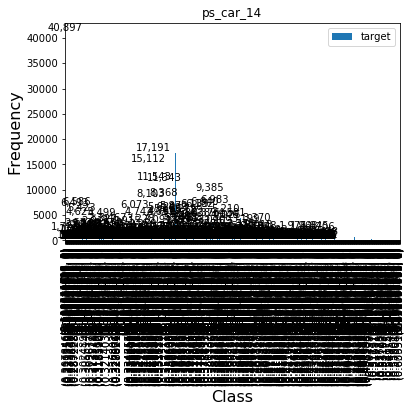

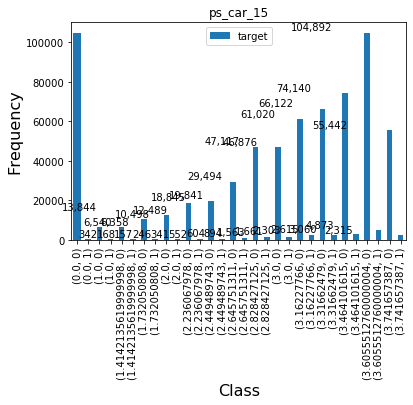

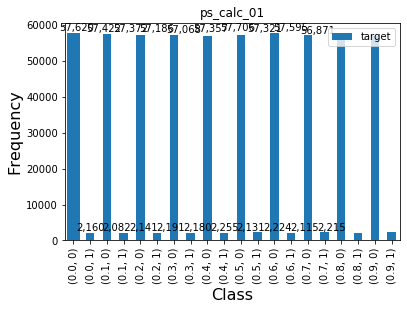

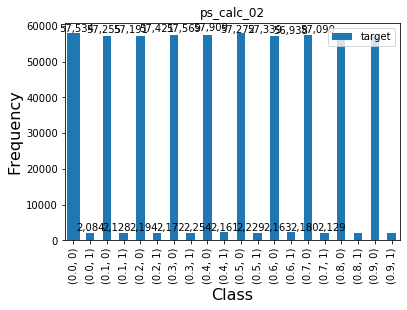

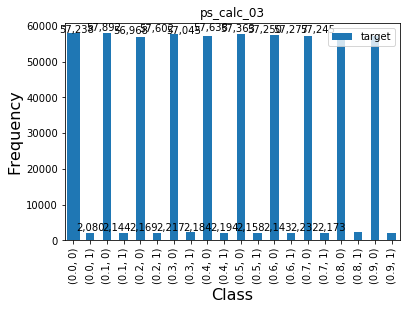

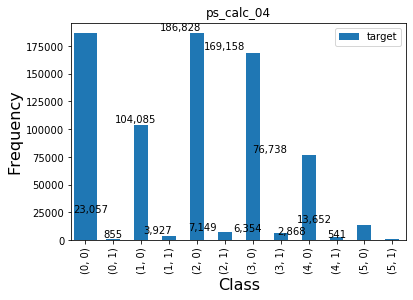

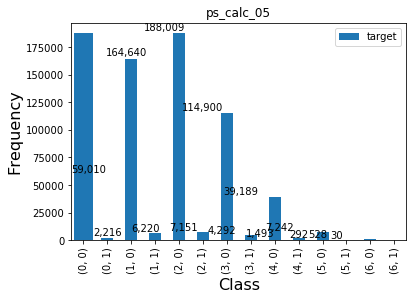

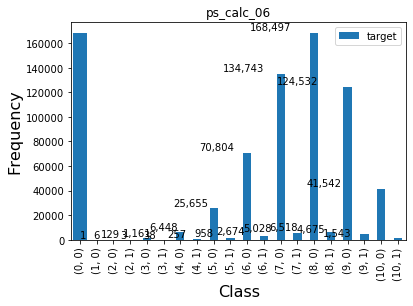

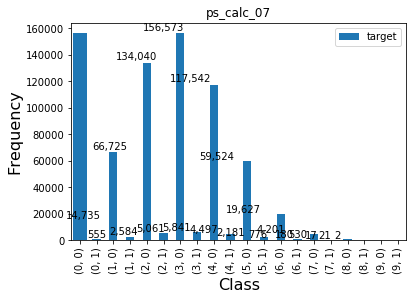

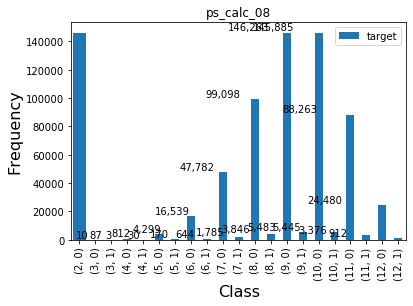

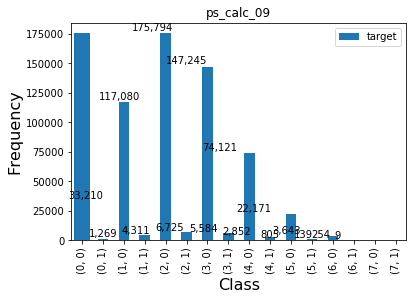

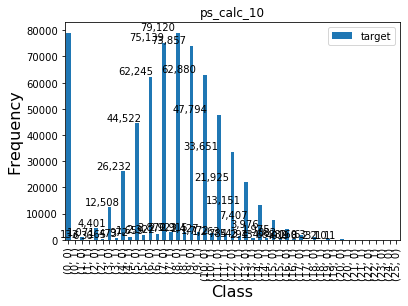

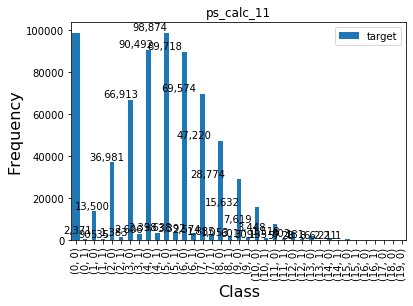

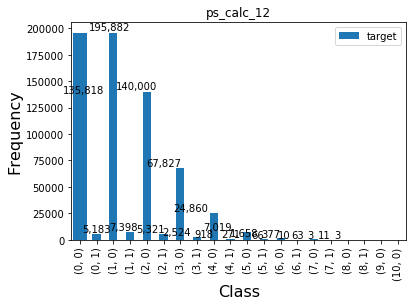

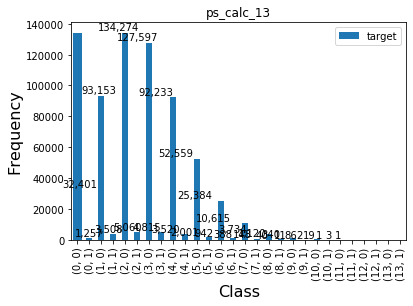

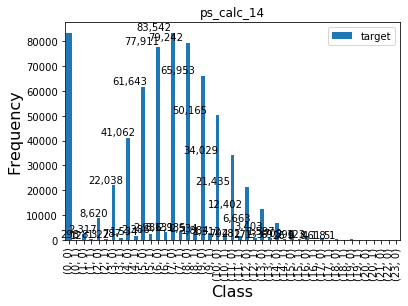

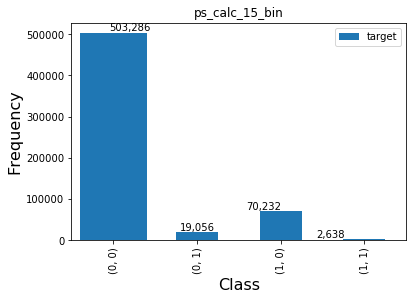

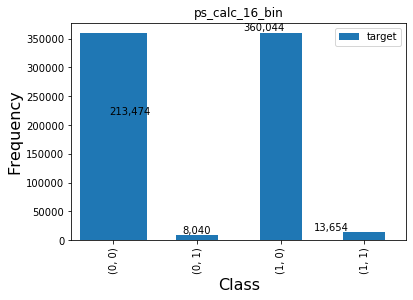

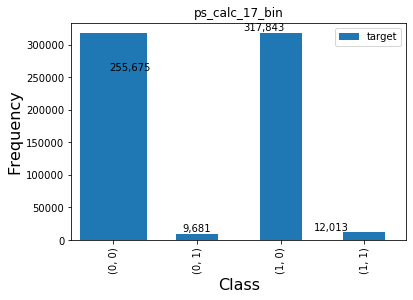

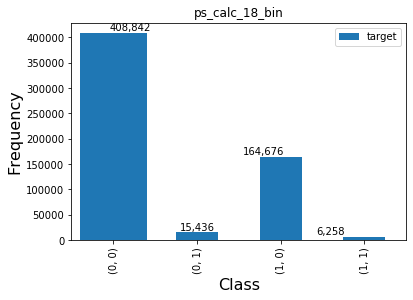

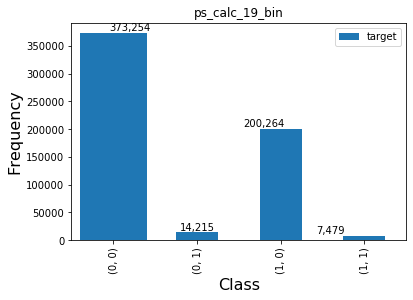

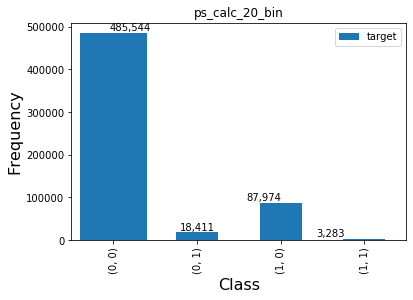

In [173]:
def autolabel1(rects):
    z=0
    for rect in rects:
        height = rect.get_height()
        ax.text((z+ rect.get_x() + rect.get_width())/2., 1.005*height,
                '{0:,d}'.format(height),
        ha='center', va='bottom')
        z=z+1.6
for a in df.columns:
    df1 = df.groupby([a,"target"])["target"].count()
    df1 = pd.DataFrame(df1)
    u=[]
    v=[]
    for x in df1.index:
        u.append(x)
    w = np.array(list(set(u)))
    df1 = pd.DataFrame(df1,index=None)
    dfs = pd.Series(df1.target)
    for x in dfs:
        v.append(x)
    ax = df1.plot.bar(stacked=False)
    rects1 = ax.bar(str(u), v)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(a)
    autolabel1(rects1)
plt.show()

## Let's answer few questions along the way

## Exploratory Data Analysis

### 1. Write at least 3 important inferences from the data above
  1. more than 80% of the data is represented by less than half of the category class in each Categorical feature. Ex: 
  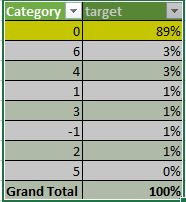
  2. In Binary feautures, the distribution of the data majory varies between 4 levels of partition, as mentioned below
    
    Data in 99:1 proportion:
     "ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","ps_ind_13_bin" 
     
    Data in 60:40 proportion:
     "ps_ind_04_bin", "ps_ind_06_bin","ps_ind_16_bin", "ps_calc_15_bin",
     "ps_calc_16_bin","ps_calc_17_bin", "ps_calc_19_bin"
     
    Data in 75:25 proportion:
    "ps_ind_07_bin","ps_ind_09_bin", "ps_calc_18_bin"
    
    Data in 85:15 proportion:
    "ps_ind_08_bin","ps_ind_17_bin","ps_ind_18_bin","ps_calc_15_bin", "ps_calc_20_bin"
    
  3. Most of the Independent features have Data concentrated on the Central part (to be Gaussian)
      Ex: 
      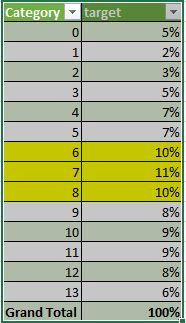
  4. Reg & Car feautures show high and minute spread
  5. Calc feutures show even spread across the categories
  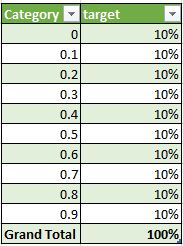
  

### 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?
Draph below clearly shows there is a class Imbalance. Almost 96% of the data belongs to Class 0, whereas only 4% of the data belongs to Class 1

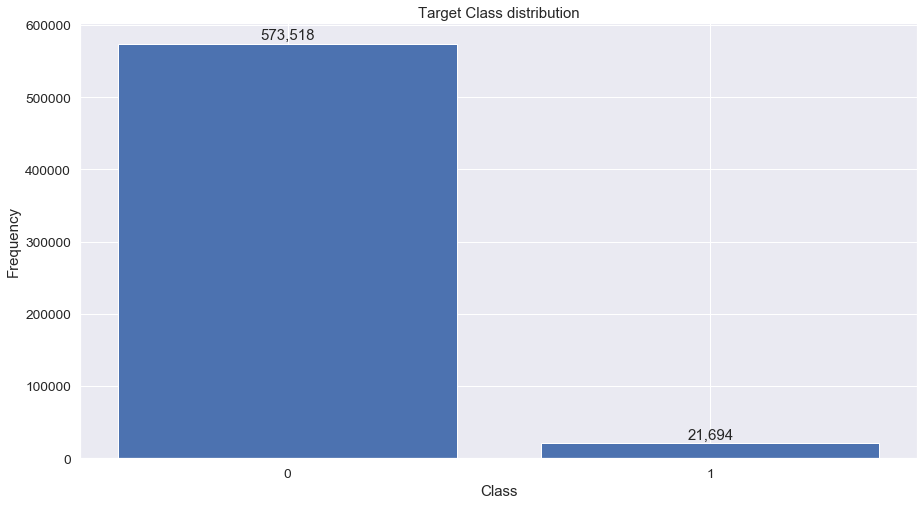

Graph Clearly shows there is a class Imbalance
almost 96% of the data belongs to Class 0, whereas only 4% of the data belongs to Class 1


target      %
target               
0       573518  96.36
1        21694   3.64

In [91]:
df1 = df.groupby("target")["target"].count()
df1=pd.DataFrame(df1)
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.target))).astype(str)
rects1 = ax.bar(X_axis, df1.iloc[:,0])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Target Class distribution")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '{0:,d}'.format(height),
        ha='center', va='bottom')
autolabel(rects1)
plt.show()
print("Graph Clearly shows there is a class Imbalance")
print("almost 96% of the data belongs to Class 0, whereas only 4% of the data belongs to Class 1")
df1.target[0], df1.target[1]
df1["%"] = [np.round((df1.target[0]/(df1.target[0]+df1.target[1]))*100,2),np.round((df1.target[1]/(df1.target[0]+df1.target[1]))*100,2)]
df1

### 3. How many categorical features are there?
 
There are 14 Categorical features. Below is the list
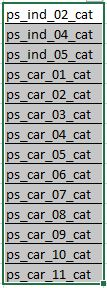


### 4. How many binary features are there?
There are 17 Binary features. Below is the list
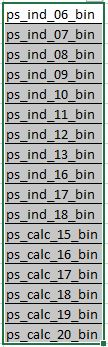
along with this, target is also a binary field

### 5. Write inferences from data on interval variables.
1. Region Interval Variables Reg01,Reg0102 and Reg0103 have concentartion of data at the starting intervals, Data is Left skewed
2. Some of the interval variables have dense spread, as high as 70K
3. 50% of the variables have range from 0 to 1, 5 out of 10 Interval Variables
4. There is no colinearity observed between interval Variables.
5. 4 out of 10 variables show moderate correlation. rest have very weak or no correlation
6. 3 out of 10 variables have values missing


In [86]:
df[Interval_var].describe()

ps_reg_01      ps_reg_02      ps_reg_03      ps_car_12  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       0.379945   
std         0.287643       0.404264       0.793506       0.058327   
min         0.000000       0.000000      -1.000000      -1.000000   
25%         0.400000       0.200000       0.525000       0.316228   
50%         0.700000       0.300000       0.720677       0.374166   
75%         0.900000       0.600000       1.000000       0.400000   
max         0.900000       1.800000       4.037945       1.264911   

           ps_car_13      ps_car_14      ps_car_15     ps_calc_01  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.813265       0.276256       3.065899       0.449756   
std         0.224588       0.357154       0.731366       0.287198   
min         0.250619      -1.000000       0.000000       0.000000   
25%         0.670867       0.333167       2.828427       0.200000   
50%         0.765811       0.368782       3.316625       0.500000   
75%         0.906190       0.396485       3.605551       0.700000   
max         3.720626       0.636396       3.741657       0.900000   

          ps_calc_02     ps_calc_03  
count  595212.000000  595212.000000  
mean        0.449589       0.449849  
std         0.286893       0.287153  
min         0.000000       0.000000  
25%         0.200000       0.200000  
50%         0.400000       0.500000  
75%         0.700000       0.700000  
max         0.900000       0.900000

### 6. Write inferences from data on ordinal variables.
1. Order of the Variables ranges from min 3 to max 25 orders
2. ordinal variables show very weak correlation between them (max is 0.22)
3. Variables vary in terms of spread as few show left skewed distribution, few are centered and others are right skewed
4. Wherever the Order is less, we see data is concentrated at the starting orders
5. Calc ordinal variables influence the target to a large extent.

In [87]:
df[Ordinal_var].describe()

ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_car_11     ps_calc_04     ps_calc_05     ps_calc_06  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        2.346072       2.372081       1.885886       7.689445   
std         0.832548       1.117219       1.134927       1.334312   
min        -1.000000       0.000000       0.000000       0.000000   
25%         2.000000       2.000000       1.000000       7.000000   
50%         3.000000       2.000000       2.000000       8.000000   
75%         3.000000       3.000000       3.000000       9.000000   
max         3.000000       5.000000       6.000000      10.000000   

          ps_calc_07     ps_calc_08     ps_calc_09     ps_calc_10  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        3.005823       9.225904       2.339034       8.433590   
std         1.414564       1.459672       1.246949       2.904597   
min         0.000000       2.000000       0.000000       0.000000   
25%         2.000000       8.000000       1.000000       6.000000   
50%         3.000000       9.000000       2.000000       8.000000   
75%         4.000000      10.000000       3.000000      10.000000   
max         9.000000      12.000000       7.000000      25.000000   

          ps_calc_11     ps_calc_12     ps_calc_13     ps_calc_14  
count  595212.000000  595212.000000  595212.000000  595212.000000  
mean        5.441382       1.441918       2.872288       7.539026  
std         2.332871       1.202963       1.694887       2.746652  
min         0.000000       0.000000       0.000000       0.000000  
25%         4.000000       1.000000       2.000000       6.000000  
50%         5.000000       1.000000       3.000000       7.000000  
75%         7.000000       2.000000       4.000000       9.000000  
max        19.000000      10.000000      13.000000      23.000000

### 7. Write inferences from data on binary variables.
1. Out of 57 total features, 17 are binary. That is 30% of the features are in binaru form
2. In Binary feautures, the distribution of the data majory varies between 4 levels of partition (0 Class to 1 Class), as mentioned below 

    Data in 99:1 proportion: 
            "ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","ps_ind_13_bin"

    Data in 60:40 proportion: 
            "ps_ind_04_bin", "ps_ind_06_bin","ps_ind_16_bin", "ps_calc_15_bin", 
            "ps_calc_16_bin","ps_calc_17_bin", "ps_calc_19_bin"

    Data in 75:25 proportion: 
            "ps_ind_07_bin","ps_ind_09_bin", "ps_calc_18_bin"

    Data in 85:15 proportion: 
            "ps_ind_08_bin","ps_ind_17_bin","ps_ind_18_bin","ps_calc_15_bin", "ps_calc_20_bin"
3. With this we can infer, most of the variables are imbalenced within the class, and to the target
4. Hardly 1% of the total binary data is associated with target class of 1. Rest all Data is associated with target class 0

### 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance
Please refer Question no 2, target data is imabalenced. Almost 96% of the data belongs to Class 0, whereas only 4% of the data belongs to Class 1

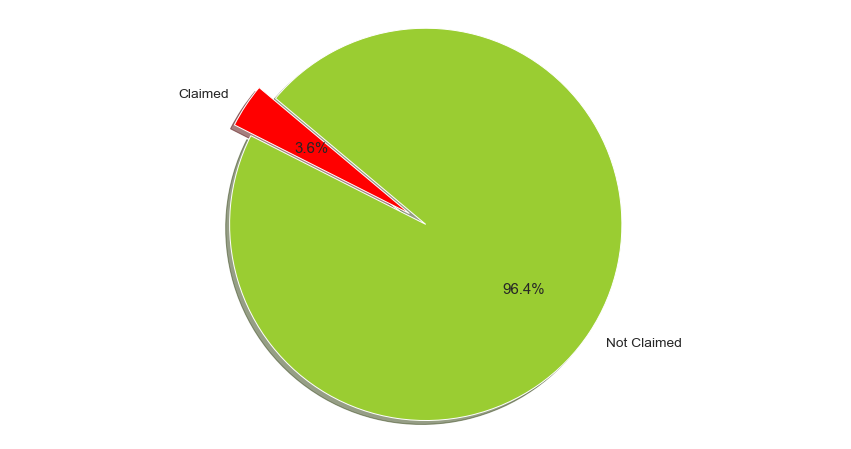

In [93]:
df1
objects = ('Claimed', 'Not Claimed')
colors = ['red', 'yellowgreen']
sizes = [(df['target'].sum()*100.0)/df.shape[0], ((df.shape[0] - df['target'].sum())*100.0)/df.shape[0]]
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### 9. What should be the preferred way in this case to balance the data?
Well in this case, for that matter in any of the case where data is imabalanced, we can go for three techniques as listed below.
    1. Under Sampling: Where we drop majority class data randomly to increase the minority class proportion.
    2. Over Samping: Here, we will duplicate the minority class data randomly so that the overall data will have more monority classes and hence balencing the data set
    3. Third option is a hybrid approach, where we can have mix of the above 2 techniques to balence the data. I mean delete some majority class data, increse some minority class data

Partcularly in this scenario since the data set is very huge, and minor class has 20k records, oversampling will further increase the dataset and execution time, slowing down the model training process. So let's undersample and retaine 20k+20K total 40k records, which is a fair number. 

### 10. How many training records are there after achieving a balance of 12%?

If we oversample then, to achieve a balence of 12% on minor class we will require 56513 addtional records to be added, making the total records of 651725.
If we undersample then, to achieve a balence of 12% on minor class we will need to delete 414429 records from major class, resulting into a dataset of total 180784 

### 11. Which are the top two features in terms of missing values?
ps_car_03_cat and ps_car_05_cat are the two features in terms of missing values

ps_car_03_cat    411231
ps_car_05_cat    266551
ps_reg_03        107772
ps_car_14         42620
ps_car_07_cat     11489
ps_ind_05_cat      5809
ps_car_09_cat       569
ps_ind_02_cat       216
ps_car_01_cat       107
ps_ind_04_cat        83
ps_car_11             5
ps_car_12             1
dtype: int64


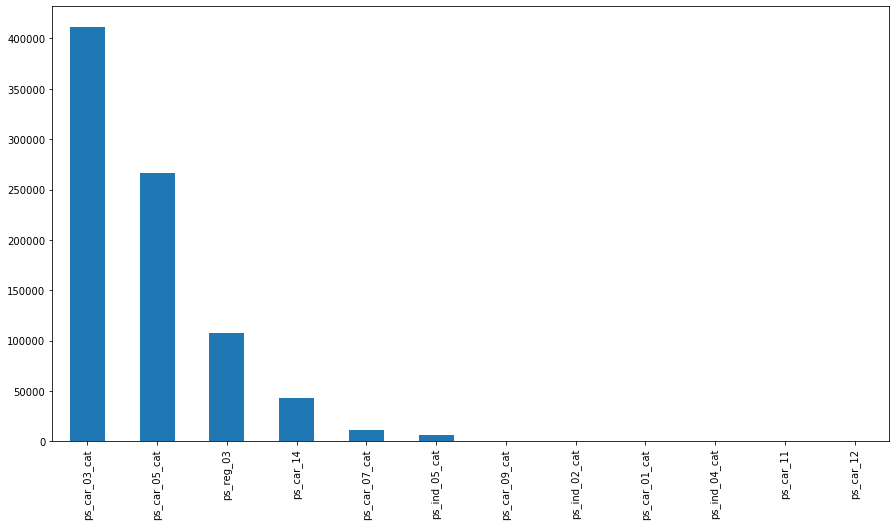

Total missing value features are:  12
Top 2 features in terms of missing value are:  ps_car_03_cat  and  ps_car_05_cat


In [39]:
train_missing_count = (df == -1).sum()
t = train_missing_count[train_missing_count != 0]
t= t.sort_values(ascending=False)
print(t)
plt.rcParams['figure.figsize'] = (15,8)
t.plot.bar()
plt.show()
print("Total missing value features are: ", len(t))
print("Top 2 features in terms of missing value are: ", t.index[0]," and ", t.index[1])

### 12. In total, how many features have missing values?
If value -1 is treated as missing feature then there are total 12 features which have missing values. Refer above output

If -1 is not considered as not missing feature then there are no missing values in any of the features. Refer below output

In [44]:
t = df.isnull().sum()*100/len(df)
t = t[t != 0]
t= t.sort_values(ascending=False)
print("No of features having NaN : ", len(t))

No of features having NaN :  0


### 13. What steps should be taken to handle the missing data?
We can take below steps if we have missing data
    1. Delete the column, if there are many missing values
    2. Fill missing data with values by keeping Same Mean and Standard deviation as earlier
    3. Use Imputers with mean/mode/meadian

### 14. Which interval variables have strong correlation
Below Variables show, strong correlation, Last entry is included since the magnitude is significant

    ps_car_12  ps_car_13    0.671720
    ps_reg_03  ps_reg_01    0.637035
    ps_car_15  ps_car_13    0.529519
    ps_reg_03  ps_reg_02    0.516457
    ps_reg_01  ps_reg_02    0.471027

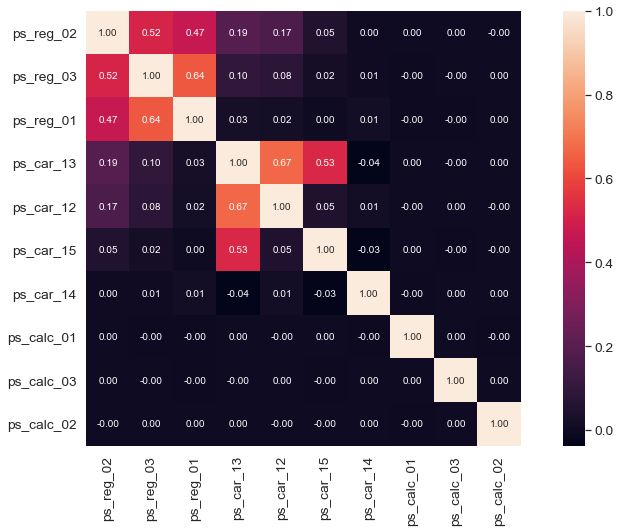

In [64]:
corrmat = df[Interval_var].corr()
k = len(Interval_var) #number of variables for heatmap
cols = corrmat.nlargest(k, 'ps_reg_02')['ps_reg_02'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,)
plt.show()

In [84]:
cort = corrmat[corrmat>0.4]
s = corrmat.unstack()
so = s.sort_values(ascending =False)
so = so[so>0.4] 
so = so[so<1]
so = so.iloc[::2]
print("Below Variables show, strong correlation, Last entry is included since the magnitude is significant")
print(so)

Below Variables show, strong correlation, Last entry is included since the magnitude is significant
ps_car_12  ps_car_13    0.671720
ps_reg_03  ps_reg_01    0.637035
ps_car_15  ps_car_13    0.529519
ps_reg_03  ps_reg_02    0.516457
ps_reg_01  ps_reg_02    0.471027
dtype: float64


### 15. What's the level of correlation among ordinal features?
As we see from the output below, we see very low correlation between Ordinal Features

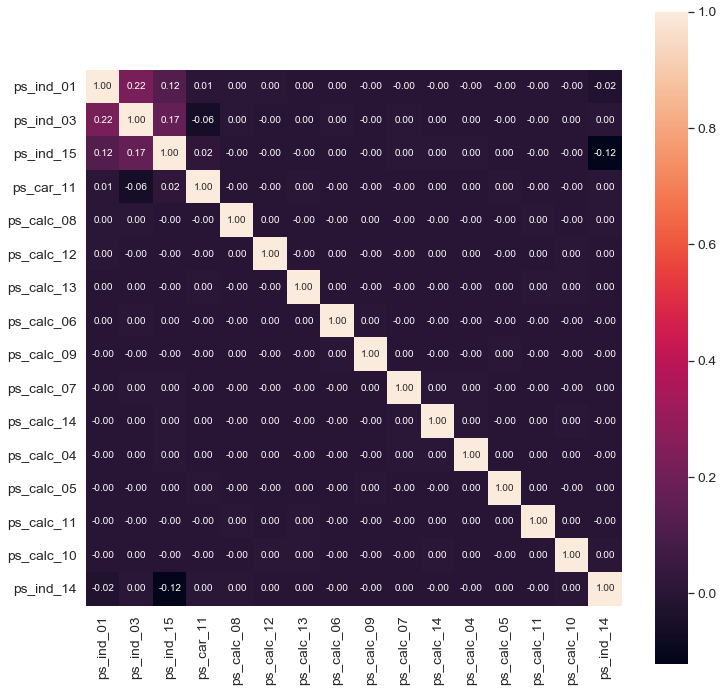

In [116]:
corrmat = df[Ordinal_var].corr()
k = len(Ordinal_var) #number of variables for heatmap
cols = corrmat.nlargest(k, 'ps_ind_01')['ps_ind_01'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,)


### 16. Implement Hot Encoding for categorical features
Let us First seperate the Categorical features and store it in a seperate Data Frame

Then Let's print the categorical elements in each feature

Then Lets Import the One Hot Encoder and apply it on seperated Categorical features


In [ ]:
#Seperate Categorical features in a seperate data frame
df_cat = df[["ps_ind_04_cat","ps_ind_02_cat","ps_ind_05_cat","ps_car_01_cat","ps_car_02_cat","ps_car_03_cat","ps_car_04_cat","ps_car_05_cat","ps_car_06_cat","ps_car_07_cat","ps_car_08_cat","ps_car_09_cat","ps_car_10_cat","ps_car_11_cat"]]

In [6]:
#print the categories of each categorical feature
ln =0
for a in df_cat.columns:
    ln = ln +len(df_cat[a].unique())
    print(df_cat[a].unique())
print("Total no of columns added after One Hot Encoding: ",ln )   

[ 1  0 -1]
[ 2  1  4  3 -1]
[ 0  1  4  3  6  5 -1  2]
[10 11  7  6  9  5  4  8  3  0  2  1 -1]
[1 0]
[-1  0  1]
[0 1 8 9 2 6 3 7 4 5]
[ 1 -1  0]
[ 4 11 14 13  6 15  3  0  1 10 12  9 17  7  8  5  2 16]
[ 1 -1  0]
[0 1]
[ 0  2  3  1 -1  4]
[1 0 2]
[ 12  19  60 104  82  99  30  68  20  36 101 103  41  59  43  64  29  95
  24   5  28  87  66  10  26  54  32  38  83  89  49  93   1  22  85  78
  31  34   7   8   3  46  27  25  61  16  69  40  76  39  88  42  75  91
  23   2  71  90  80  44  92  72  96  86  62  33  67  73  77  18  21  74
  37  48  70  13  15 102  53  65 100  51  79  52  63  94   6  57  35  98
  56  97  55  84  50   4  58   9  17  11  45  14  81  47]
Total no of columns added after One Hot Encoding:  183


In [7]:
#Hot Encode the Categorical Data
df_cat_encoded = pd.DataFrame()
onehotencoder = OneHotEncoder(categories='auto',sparse = False) 
data = onehotencoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(data)
df_cat_encoded.head()

0    1    2    3    4    5    6    7    8    9    ...  173  174  175  176  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   

   177  178  179  180  181  182  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 183 columns]

### 17.In nominal and interval features, which features are suitable for StandardScaler?
Before coming to the conclusion, lets first understand what is nominal and interval features. 

Nominal features are Qualitative, and in a way categorical without any order or rank.

Where as interval features are Quantitative and are represented by Lower and Upper bounds of the interval. Ex: 0-10, 11-20 etc

So scaling qualitative features does not really have an effect, as its just a classification and numbers really does not have significance. On the other hand, if the interval ranges are varying largely then it makes sense to bring all the data in the rage of 0 to 1 for the ease of calculation and to bring the data into a common coparable unit.

Hence StandardScalar is suitable for Interval features. 

### 18. Summarize the learnings of ED
Below is the high level summary of the ED
    1. target variable is highly imbalenced, hence need to balence the data before we build model
    2. Binary features form 30% of the total dataset, cat and calc form next 50% of the data together
    3. Calc & Reg variables are spread across a minute gap and high range, need to scale this data
    4. less than 50% of the categories in each categorical variable hold more than 80% of the total information
    5. Classes can be as high as 90 in Categorical variables
    6. Most of the Independent features have Data concentrated on the Central part (to be Gaussian)
    7. Calc feutures show even spread across the categories

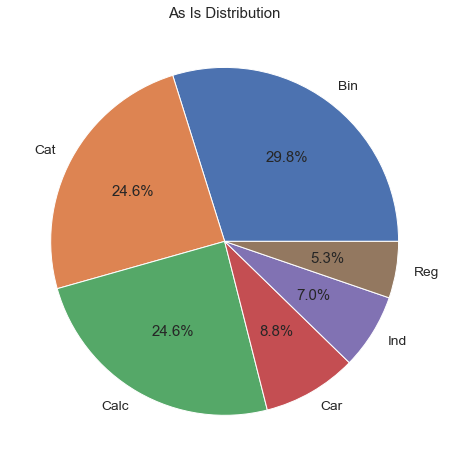

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


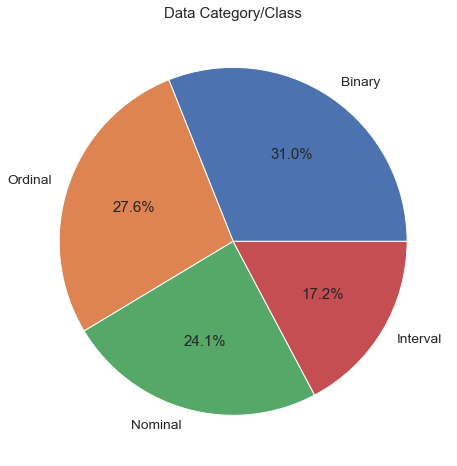

In [96]:
plt.pie([17,14,14,5,4,3],labels=["Bin","Cat","Calc","Car","Ind","Reg"],autopct='%1.1f%%' )
plt.title("As Is Distribution")
plt.show()

plt.pie([meta_data.level.value_counts()],labels=["Binary","Ordinal","Nominal","Interval"],autopct='%1.1f%%' )
plt.title("Data Category/Class")
plt.show()

## Modeling
Let's run the Logistic regression Model on the dataset without any preprocessing and check the accuracy

In [21]:
#Seperate the target from the feautures
y = df["target"]
df = df.drop(["target"], axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.6)
LR=LogisticRegression()
train_score = LR.fit(x_train, y_train).score(x_train, y_train)
print("Train Score without preprocessing: ",train_score)
y_pred = LR.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print("Test Score without preprocessing: ",train_score)

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Score without preprocessing:  0.9637018867290537
Test Score without preprocessing:  0.9637018867290537


### 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

In the previous output both Train and Test Scores are same, that is 96.37%. Wow, amazing isn't it?
Let me give one more insight, What's the majority class proportion? Its also 96.36%
Still, did not get? Let me give one more insight. What are the predicted classes? see below 

In [26]:
Major_Target_Class =573518/(573518+21694)
Uniq_pred = np.unique(y_pred)
print("Majority class proportion: ",Major_Target_Class)
print("Unique Predicted Classes: ", Uniq_pred)

Majority class proportion:  0.963552482140817
Unique Predicted Classes:  [0]


Did you see, our model has predicted only Class 0, there are no predictions for Class 1. Is that what we expected this model to do?? No definitely not...!!
This means, even if you blindly predict everything as Class 0, you will still get an accuracy equal to the size of the majority class. While Majority class targets get predicted correctly, there is a complete injustice with Class 1 classification, as its always 0 for all the input.

This is the problem with this model, where dataset is imbalenced. This is why, we cant rely on accuracy score, and hence F1 score is a better measure to assess the goodness of the model. Lets see this in next section

### 2. Why do you think f1-score is 0.0?
Let's first calculate the Confusion metrix and F1 Score

Confusion Matrix: 
 [[344076      0]
 [ 13052      0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    344076
           1       0.00      0.00      0.00     13052

   micro avg       0.96      0.96      0.96    357128
   macro avg       0.48      0.50      0.49    357128
weighted avg       0.93      0.96      0.95    357128



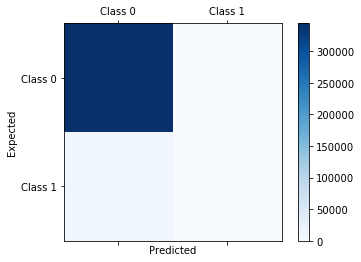

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",conf_mat)
print("Classification Report: \n",classification_report(y_test, y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Did you observe in the above output, for Class 1, precision, recall and f1 scores are 0
This is because, model predicted everything as Class 0, there is nothing left to calculate for class 1

Hence, all the scores are 0 for Class 1

### 3. What is the precision and recall score for the model?
As you observe in the previous output, precision and recall scores are 0 

### 4. What is the most important inference you can draw from the result?
Important conclusion we can draw from the result is, for any imbalenced dataset do not rely on accuracy score. f1 score & AUC Score is a better measure of the goodness of the model. for that matter, always its better to judge the model on f1 score & AUC Score and use the data balencing techniques before building the model. Otherwise the results could be misleading.. 

### 5. What is the accuracy score and f1-score for the improved Logistic Regression model?
Now,let us balance the data and see whether is there any improvement in the model prediction..
Let's first try the undersampling, and bring the target data to a 50:50 balance.

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


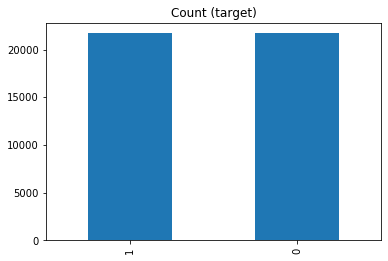

In [37]:
df = pd.read_csv("train.csv")
df = df.drop(["id"], axis=1)

# Class count
count_class_0, count_class_1 = df.target.value_counts()

# Divide by class
df_class_0 = df[df["target"]== 0]
df_class_1 = df[df["target"]== 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.target.value_counts())

df_under.target.value_counts().plot(kind='bar', title='Count (target)')

Now let's run the Logistic regression model again and check the classification report

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Score without preprocessing:  0.5898588303082685
Test Score without preprocessing:  0.5898588303082685
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[8210 4809]
 [5845 7169]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.61     13019
           1       0.60      0.55      0.57     13014

   micro avg       0.59      0.59      0.59     26033
   macro avg       0.59      0.59      0.59     26033
weighted avg       0.59      0.59      0.59     26033



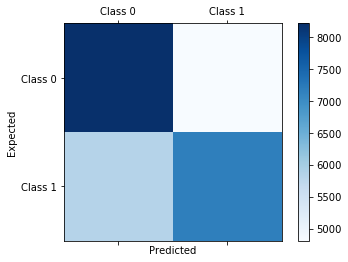

In [38]:
y_under = df_under["target"]
df_under = df_under.drop(["target"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_under, y_under, test_size=0.6)
LR=LogisticRegression()
train_score = LR.fit(x_train, y_train).score(x_train, y_train)
print("Train Score without preprocessing: ",train_score)
y_pred = LR.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print("Test Score without preprocessing: ",train_score)

Uniq_pred = np.unique(y_pred)
print("Unique Predicted Classes: ", Uniq_pred)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",conf_mat)
print("Classification Report: \n",classification_report(y_test, y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

    Did you see, now our model is predicting both the classes
    our accuracy score dropped to 58.9% from 96%.
    f1 score for Class 1 increased from 0 to 0.59
    precision increased from 0 to  0.60
    And recall rate increased from 0 to 0.55
    
    Now let's try Oversampling as well on a high note..

Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


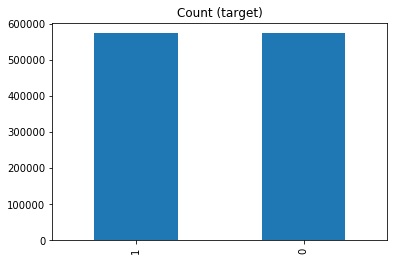

In [41]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print('Random over-sampling:')
print(df_over.target.value_counts())
df_over.target.value_counts().plot(kind='bar', title='Count (target)');

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Score without preprocessing:  0.5895569882348839
Test Score without preprocessing:  0.5895569882348839
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[215775 128171]
 [155513 188763]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60    343946
           1       0.60      0.55      0.57    344276

   micro avg       0.59      0.59      0.59    688222
   macro avg       0.59      0.59      0.59    688222
weighted avg       0.59      0.59      0.59    688222



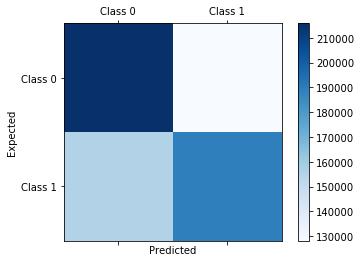

In [42]:
y_over = df_over["target"]
df_over = df_over.drop(["target"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_over, y_over, test_size=0.6)
LR=LogisticRegression()
train_score = LR.fit(x_train, y_train).score(x_train, y_train)
print("Train Score without preprocessing: ",train_score)
y_pred = LR.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print("Test Score without preprocessing: ",train_score)

Uniq_pred = np.unique(y_pred)
print("Unique Predicted Classes: ", Uniq_pred)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",conf_mat)
print("Classification Report: \n",classification_report(y_test, y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

As you see with Oversampling as well, we see exact same values for all the metrix. 
With Improved LR model Score is 0.59 and F1 score is 0.57

### 6. Why do you think f1-score has improved?
As we improved the target data balance, our model now started predicting the Class 1 category as well. Earlier this was 0, now we have some non zero count. This is where the f1 score also increased from 0 to 0.59, as now data is avaible to calculate f1 score for class 1.

### 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement
    As we evidence in the output, accuracy and f1 score increase with increase in number of iterations, keeping dual as True
    And with dual set to False, there is no effect of iterations on the accuarcy and f1 score howevr we get max accuracy and F1 score of 59% for dual = False.

Report for LinearSVC with duel = True and max_iter = 10

Train Score without preprocessing:  0.5136370620774432
Test Score without preprocessing:  0.5136370620774432
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[2139 6525]
 [1905 6787]]
Classification Report: 


C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


               precision    recall  f1-score   support

           0       0.53      0.25      0.34      8664
           1       0.51      0.78      0.62      8692

   micro avg       0.51      0.51      0.51     17356
   macro avg       0.52      0.51      0.48     17356
weighted avg       0.52      0.51      0.48     17356



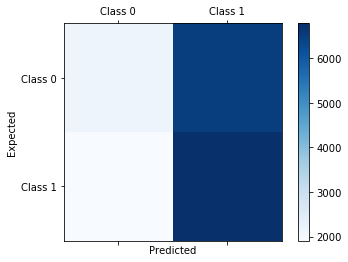



Report for LinearSVC with duel = True and max_iter = 100



C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Score without preprocessing:  0.5026889981561156
Test Score without preprocessing:  0.5026889981561156
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[ 182 8482]
 [  94 8598]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.02      0.04      8664
           1       0.50      0.99      0.67      8692

   micro avg       0.51      0.51      0.51     17356
   macro avg       0.58      0.51      0.35     17356
weighted avg       0.58      0.51      0.35     17356



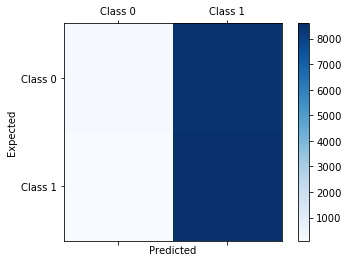



Report for LinearSVC with duel = True and max_iter = 1000



C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Score without preprocessing:  0.5046865396435156
Test Score without preprocessing:  0.5046865396435156
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[ 245 8419]
 [ 162 8530]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.03      0.05      8664
           1       0.50      0.98      0.67      8692

   micro avg       0.51      0.51      0.51     17356
   macro avg       0.55      0.50      0.36     17356
weighted avg       0.55      0.51      0.36     17356



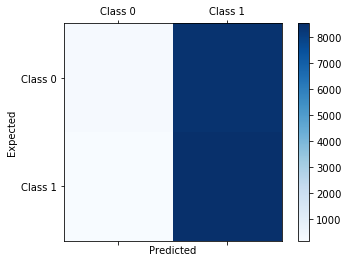



Report for LinearSVC with duel = True and max_iter = 10000



C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Score without preprocessing:  0.5402965580823602
Test Score without preprocessing:  0.5402965580823602
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[1614 7050]
 [ 999 7693]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.19      0.29      8664
           1       0.52      0.89      0.66      8692

   micro avg       0.54      0.54      0.54     17356
   macro avg       0.57      0.54      0.47     17356
weighted avg       0.57      0.54      0.47     17356



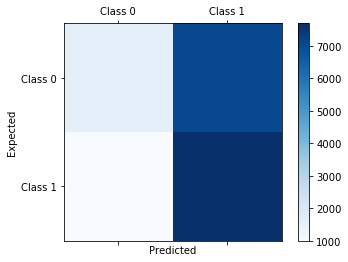



Report for LinearSVC with duel = False and max_iter = 10

Train Score without preprocessing:  0.5974569760295021
Test Score without preprocessing:  0.5974569760295021
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[5444 3220]
 [4063 4629]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      8664
           1       0.59      0.53      0.56      8692

   micro avg       0.58      0.58      0.58     17356
   macro avg       0.58      0.58      0.58     17356
weighted avg       0.58      0.58      0.58     17356



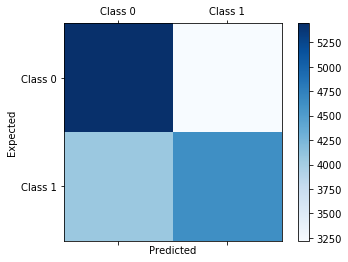



Report for LinearSVC with duel = False and max_iter = 100

Train Score without preprocessing:  0.5974569760295021
Test Score without preprocessing:  0.5974569760295021
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[5444 3220]
 [4063 4629]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      8664
           1       0.59      0.53      0.56      8692

   micro avg       0.58      0.58      0.58     17356
   macro avg       0.58      0.58      0.58     17356
weighted avg       0.58      0.58      0.58     17356



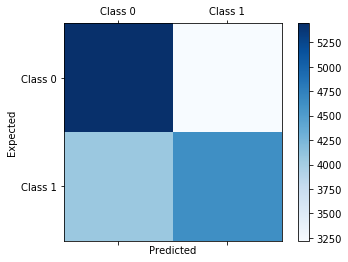



Report for LinearSVC with duel = False and max_iter = 1000

Train Score without preprocessing:  0.5974569760295021
Test Score without preprocessing:  0.5974569760295021
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[5444 3220]
 [4063 4629]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      8664
           1       0.59      0.53      0.56      8692

   micro avg       0.58      0.58      0.58     17356
   macro avg       0.58      0.58      0.58     17356
weighted avg       0.58      0.58      0.58     17356



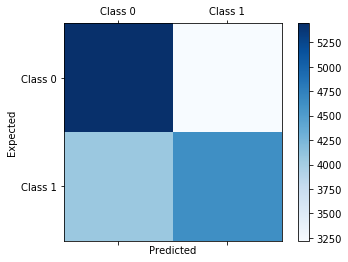



Report for LinearSVC with duel = False and max_iter = 10000

Train Score without preprocessing:  0.5974569760295021
Test Score without preprocessing:  0.5974569760295021
Unique Predicted Classes:  [0 1]
Confusion Matrix: 
 [[5444 3220]
 [4063 4629]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      8664
           1       0.59      0.53      0.56      8692

   micro avg       0.58      0.58      0.58     17356
   macro avg       0.58      0.58      0.58     17356
weighted avg       0.58      0.58      0.58     17356



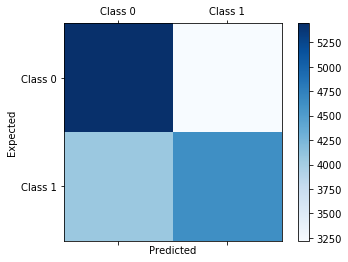

In [48]:
from sklearn.svm import SVC, LinearSVC

x_train, x_test, y_train, y_test = train_test_split(df_under, y_under, test_size=0.4)
duel =[True, False]
max_iter = [10,100,1000,10000]

for d in duel:
    for mi in max_iter:
        print("=======================================================================")
        print("Report for LinearSVC with duel = "+str(d)+" and max_iter = "+str(mi))
        print("=======================================================================\n")
        LSVC = LinearSVC(dual=d, max_iter = mi)
        train_score = LSVC.fit(x_train, y_train).score(x_train, y_train)
        print("Train Score without preprocessing: ",train_score)
        y_pred = LSVC.predict(x_test)
        test_score = accuracy_score(y_test, y_pred)
        print("Test Score without preprocessing: ",train_score)

        Uniq_pred = np.unique(y_pred)
        print("Unique Predicted Classes: ", Uniq_pred)

        conf_mat = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix: \n",conf_mat)
        print("Classification Report: \n",classification_report(y_test, y_pred))

        labels = ['Class 0', 'Class 1']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.show()
        print("\n")

##### Now let us also tryout ensembele models before we move further.

Accuracy: 0.5777252823231159
ps_car_13         0.057870
ps_reg_03         0.050402
ps_car_14         0.042395
ps_car_11_cat     0.036306
ps_ind_15         0.034598
ps_calc_10        0.034435
ps_calc_14        0.033621
ps_ind_03         0.032404
ps_calc_11        0.031234
ps_calc_01        0.031189
ps_calc_03        0.030794
ps_calc_02        0.030615
ps_reg_02         0.030384
ps_car_15         0.027948
ps_calc_13        0.027761
ps_calc_08        0.025585
ps_calc_07        0.024845
ps_reg_01         0.024839
ps_car_06_cat     0.024548
ps_calc_06        0.023979
ps_ind_01         0.023934
ps_calc_09        0.023302
ps_car_12         0.023254
ps_calc_12        0.021794
ps_calc_04        0.021651
ps_calc_05        0.021554
ps_car_01_cat     0.021368
ps_ind_05_cat     0.012410
ps_car_09_cat     0.011649
ps_car_11         0.011505
ps_car_05_cat     0.011410
ps_ind_02_cat     0.010311
ps_car_03_cat     0.009096
ps_calc_17_bin    0.008349
ps_calc_16_bin    0.008189
ps_calc_19_bin    0.007914

No handles with labels found to put in legend.


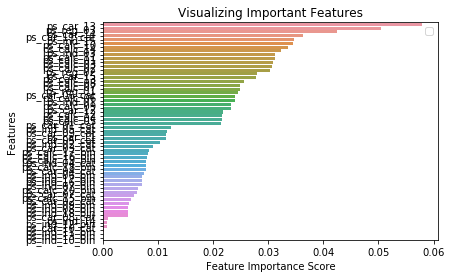

In [53]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=list(x_test.columns)).sort_values(ascending=False)
print(feature_imp)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Did you observe, binary features and most of the categorical features have low importance, as expected.
Also accuracy of the model is not so great compared to Logistic Regression Model.
Next lets do some feature selection, extraction and sampling and check whether we have a tresure in store..!!

### 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?

Lets select features, in the following order (refer PlayAround.ipynb Section 3.1 and 3.2)
1. Balence the dataset
2. Select 100K records
2. Low Variance Filter
3. High correlation filter
4. Random Forest Important features
5. Principal Component Analysis

Please check the table below, the performance of SVC model with various variants of the features.
It is seen from the below result that, there is no significant improvement in the scores even after using Feature optimization, imabalece check and only 100 records. Indeed We get best results on Raw Data with Balenced data and 100k records.

Please Refer PlayAround.ipynb 4.a, and corresponding other sections as mentioned in the table below for execution details
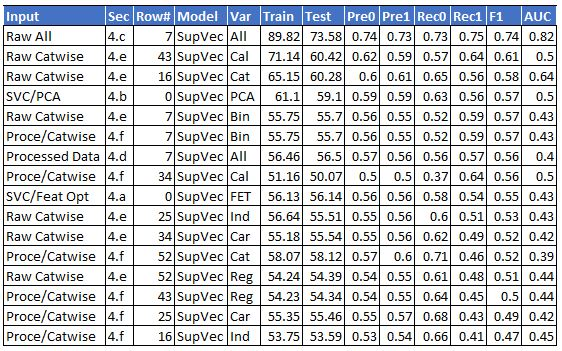

### 9. XGBoost is of one the better classifiers -- but still f1-score is very low. What could be the reason?

Please refer the reasearch paper of XGBoost by Tianqi Chen
https://arxiv.org/pdf/1603.02754.pdf

Since the datset is imbalanced, we either go for under/over sampling. In each case the model will end up selecting same records multiple times in the bagging process. So the learning is not great, when this output/loss is selected for boosting in the next tree, We start with limited learning, and hence further learnings will be limited.

Secondly, Since we have most of the binary and other classes also imbalanced within the class, Greedy Algorithm for Split Finding will not yeild optimal split. This will also further degrade the scores.

Thirdly, Approximate Algorithm for Split Finding will also under perform for the same reason.
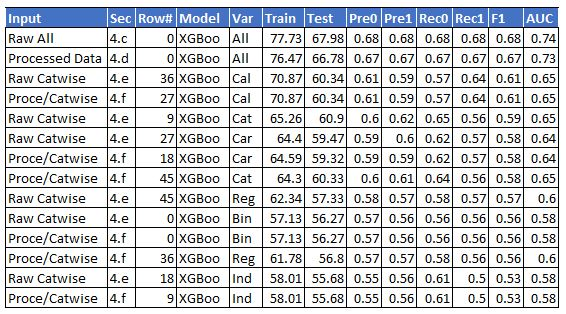

### 10. What is the increase in number of features after one-hot encoding of the data?
Post one hot encoding the Categorical feautures, we will add up 183 features in place of earlier 16 Categorical Variables.So earlier 57 features will now be increased to 226 features. 

### 11. Is there any improvement in scores after encoding?

If you compare the results of raw Data and processed(encoded) data. Clearly all the models perform better on Raw data than the processed data.

Please refer, PlayAround.ipynb Section 4.c and PlayAround.ipynb Section 4.c & 4.d

    Comparison below:
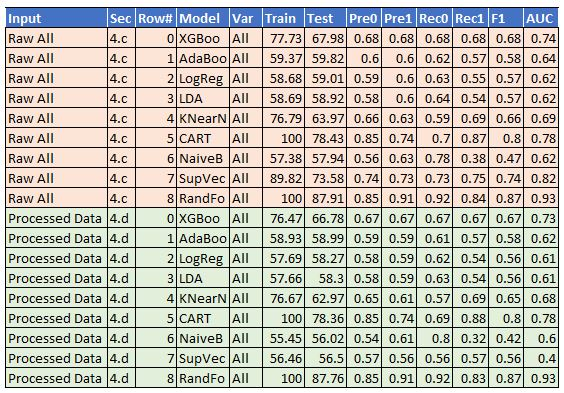

### 12. If not missing a positive sample is the priority which model is best so far?
This is nothing but the True Positives recovred as Positive values correctly. Indeed its Recall Rate for Class 1. Random Forest again bags 1st place with processed Cat and Calc features alone. Next best performance is given by CART on all the variety of Input Data.

Please refer below Table for details.

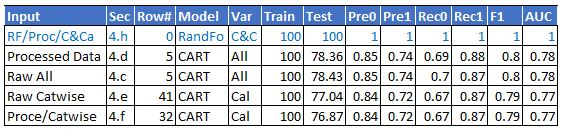

### 13. If not marking negative sample as positive is top priority, which model is best so far?
This is nothing but, marking/predicting negative sample as negative is top priority. Indeed its Precision Rate for Class 0.
Again Random Forest performs very well on Processed Cat and Calv feauters. Next places are bagged by RF and CART, as shown in the table below.
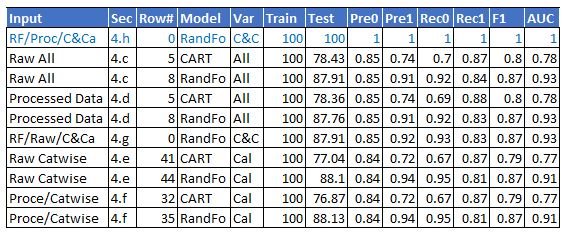

### 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

No, as adaptive boosting tries to distribute the error and then try to reduce the loss function in subsequent sequential trees. Where as XGBoost tries to minimize the loss with the help of Gradient descent, and boosting the strong learners amoungst the week.
Hence XGBoost is always better in terms of results, performance and reliablity.
Please refer below table, max F1 score we get is 0.58, which is nowhere comparable to XGBoost F1 scores (refer section 9 in this notebook).
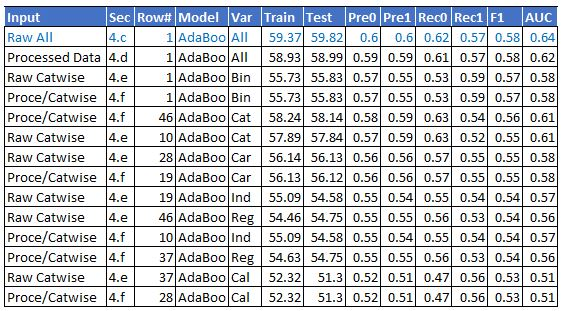


### 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

It actually depends on how many seperation lines are required to classify the output. Seperation lines will become neurons and the connections will become the number of layers.Please refer the below link

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

Its easy to decide if the input size is 2. But it becomes difficult if the Input features increase from more than 3. In such situation, There are few suggestions in the community, like
-- 2 to 3 Layers are sufficient usually
-- Hidden layer neaurons size must be 2/3rd of the input neurons plus the output neurons.

https://stackoverflow.com/questions/40943314/setting-the-number-of-output-nodes-in-scikit-learns-mlpclassifier
https://www.heatonresearch.com/2017/06/01/hidden-layers.html
https://www.researchgate.net/post/What_is_the_criteria_to_select_optimal_number_of_hidden_layer_neurons_in_MLP_neural_network

But this is not a hard and fast rule, may be we can adopt these suggestions and start experimenting with no of layers and neurons. Wherever we see the scores improving, we can further tune the parametrs to get best model.

### 16. At what layer size we get the best f1-score?

Below architectures were designed and tried with MLP Classifier.
It was also tried with different number of epochs, and various combinations, wherever the score was increasing.
Please refer PlayAround.ipynb Section 5 for more details

If you look in the below table, the first item is a tuple with one element 151. This means there is only one hidden layer with 151 neurons. Like wise, if you consider second item, its a tuple of of 2 elements 151 and 101, this means, hidden layer has 2 layers first hidden layer with 151, and second hidden layer with 101 neurons. Along with hidden layers we have 226 Input and 1 output neurons in Input and output layers respectively as a standard across all the architectures.

This architecture is designed on 2/3rds algorithm (defined in section 2.c of PlayAround.ipynb). This simply reduces the next level neurons to 2/3 of the previous layer neurons.
Ex: 2/3 of 226 =151, 2/3rd of 151 =101

    (151,),
     (151, 101),
     (151, 101, 67),
     (151, 101, 67, 45),
     (151, 101, 67, 45, 30),
     (151, 101, 67, 45, 30, 20),
     (151, 101, 67, 45, 30, 20, 13),
     (151, 101, 67, 45, 30, 20, 13, 9),
     (151, 101, 67, 45, 30, 20, 13, 9, 6),
     (151, 101, 67, 45, 30, 20, 13, 9, 6, 4),
     (151, 101, 67, 45, 30, 20, 13, 9, 6, 4, 3),
     (151, 101, 67, 45, 30, 20, 13, 9, 6, 4, 3, 2)

We get Best F1 Score of 0.67 at below 2 architecture configurations. Considering the other metrix with F1, I will choose the second architecture in the beolw table to be best with 226 Input neurons, I hidden Layer with 154 neurons and an output layer with 1 neuron. 

        Based on F1 Score:
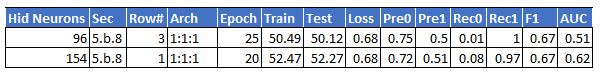

        Based on AUC Score:
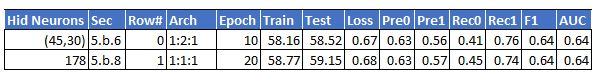
              
    This Implies, Model will have its peak accuracy between 1 to 3 hidden layers with neurons between 96 to 30 in each layer    

##                         End of Project Report